Everest_Casualties_Analysis - (Deaths while climbing the Mount Everest (Since 1900))

<br> By-
<br>-- Md Ahad Siddiki 
<br>-- Computer Science & Engineering, Jahangirnagar University
<br>-- Analysis Done on - December 2024: 

### 1. Select a unique dataset.
Dataset collected from Kaggle.

In [42]:
import pandas as pd
# Load the dataset
file_path = 'D:/mount_everest_deaths.csv'
data = pd.read_csv(file_path)
# Display the first few rows to inspect the dataset
data.head() # Dataset preview

No.    Name          Date  Age                             Expedition  \
0    1   Dorje  June 7, 1922  NaN  1922 British Mount Everest Expedition   
1    2  Lhakpa  June 7, 1922  NaN  1922 British Mount Everest Expedition   
2    3   Norbu  June 7, 1922  NaN  1922 British Mount Everest Expedition   
3    4  Pasang  June 7, 1922  NaN  1922 British Mount Everest Expedition   
4    5    Pema  June 7, 1922  NaN  1922 British Mount Everest Expedition   

  Nationality Cause of death         Location  
0       Nepal      Avalanche  Below North Col  
1       Nepal      Avalanche  Below North Col  
2       Nepal      Avalanche  Below North Col  
3       Nepal      Avalanche  Below North Col  
4       Nepal      Avalanche  Below North Col

In [43]:
data.info() # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


### 2. Clean the dataset using Pandas and Numpy

In [44]:
import pandas as pd
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())  # Replace NaN in 'Age' with the median age
data['Expedition'] = data['Expedition'].fillna('Unknown Expedition')  # Fill missing expeditions
data['Cause of death'] = data['Cause of death'].fillna('Unknown Cause')  # Fill missing causes
data['Location'] = data['Location'].fillna('Unknown Location')  # Fill missing locations


# Drop any rows where critical columns like 'Name' or 'Date' might be missing (none in this case)
data = data.dropna(subset=['Name', 'Date'])
# Check for and remove duplicates
data = data.drop_duplicates()

# Final cleaned dataset overview
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No.             309 non-null    int64         
 1   Name            309 non-null    object        
 2   Date            309 non-null    datetime64[ns]
 3   Age             309 non-null    float64       
 4   Expedition      309 non-null    object        
 5   Nationality     308 non-null    object        
 6   Cause of death  309 non-null    object        
 7   Location        309 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 21.7+ KB


No.                    Name       Date   Age  \
0      1                   Dorje 1922-06-07  38.0   
1      2                  Lhakpa 1922-06-07  38.0   
2      3                   Norbu 1922-06-07  38.0   
3      4                  Pasang 1922-06-07  38.0   
4      5                    Pema 1922-06-07  38.0   
..   ...                     ...        ...   ...   
305  306  Christopher Jon Kulish 2019-05-27  62.0   
306  307               Puwei Liu 2021-05-12  55.0   
307  308           Abdul Waraich 2021-05-12  41.0   
308  309      Pemba Tashi Sherpa 2021-05-18  28.0   
309  310      Wong Dorchi Sherpa 2021-05-23  38.0   

                                Expedition    Nationality  \
0    1922 British Mount Everest Expedition          Nepal   
1    1922 British Mount Everest Expedition          Nepal   
2    1922 British Mount Everest Expedition          Nepal   
3    1922 British Mount Everest Expedition          Nepal   
4    1922 British Mount Everest Expedition          Nepal   
..                                     ...            ...   
305             Climbing the Seven Summits  United States   
306                     Seven Summit Treks  United States   
307                     Seven Summit Treks    Switzerland   
308             Climbing the Seven Summits          Nepal   
309                         7 Summits Club          Nepal   

                   Cause of death                  Location  
0                       Avalanche           Below North Col  
1                       Avalanche           Below North Col  
2                       Avalanche           Below North Col  
3                       Avalanche           Below North Col  
4                       Avalanche           Below North Col  
..                            ...                       ...  
305  Cardiac event during descent                 South Col  
306                    Exhaustion         Near South Summit  
307                    Exhaustion         Near South Summit  
308          Fall into a crevasse  Between Camp I & Camp II  
309                 Unknown Cause            near South Col  

[309 rows x 8 columns]

In [45]:
data['Cause of death'].value_counts().head(10)

Cause of death
Avalanche                                                        50
Fall                                                             46
Exposure                                                         25
Altitude sickness                                                17
Base Camp avalanche following the April 2015 Nepal earthquake    16
2014 Mount Everest Avalanche                                     15
Unknown Cause                                                    14
Disappearance (likely accidental death during climb)             11
Fall into a crevasse                                             10
Exhaustion                                                        9
Name: count, dtype: int64

In [46]:
data['Location'].value_counts().head(10)

Location
Icefall             36
Base Camp           23
Unknown Location    19
N.E. Ridge          19
Below North Col     13
8600m N.E. Ridge     8
6400m                7
Near Summit          7
South Col            7
Balcony              5
Name: count, dtype: int64

In [47]:
data['Expedition'].value_counts().head(10)

Expedition
Unknown Expedition                                            39
Adventure Consultants                                         13
International                                                 10
Japanese Expedition                                            8
Japanese Skiing Expedition                                     7
Indian Expedition                                              7
1922 British Mount Everest Expedition                          7
American                                                       7
French West Ridge Direct expedition                            6
Polish-led expedition that included four U.S. mountaineers     5
Name: count, dtype: int64

In [48]:
nation=data['Nationality']
nation1=nation.value_counts()
print(nation1)

Nationality
Nepal              116
India               25
United States       20
Japan               19
United Kingdom      18
China               11
South Korea         11
Australia            8
Poland               7
Germany              7
Russia               7
France               6
Canada               6
Czechoslovakia       5
Spain                4
Bulgaria             3
Switzerland          3
Austria              3
New Zealand          3
Italy                3
Ireland              3
Hungary              2
Yugoslavia           2
Taiwan               2
Czech                2
Denmark              2
Chile                1
Ukraine              1
Slovenia             1
Belgium              1
Brazil               1
Sweden               1
Bangladesh           1
Netherlands          1
Slovakia             1
North Macedonia      1
Name: count, dtype: int64


In [49]:
import pandas as pd
import numpy as np

# 1. Drop rows with missing values
data.dropna(inplace=True)

# 2. Standardize text columns
text_columns = ['Name', 'Expedition', 'Nationality', 'Cause of death', 'Location']
for col in text_columns:
    data[col] = data[col].str.strip().str.title()  # Remove leading/trailing spaces and capitalize

#  Ensure 'Date' column is in datetime format and extract features
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year  # Extract Year
data['Month'] = data['Date'].dt.month  # Extract Month
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Extract Day of the week (0=Monday, 6=Sunday)

#  Handle outliers in 'Age' using IQR (Create a new column 'Age_Cleaned')
Q1 = data['Age'].quantile(0.25)  # First quartile
Q3 = data['Age'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR  # Lower bound
upper_bound = Q3 + 1.5 * IQR  # Upper bound

# Create a new column with outlier-handled values
age_median = data['Age'].median()
data['Age_Cleaned'] = np.where((data['Age'] < lower_bound) | (data['Age'] > upper_bound), age_median, data['Age'])

#  Normalize the 'Age_Cleaned' column
data['Age_Normalized'] = (data['Age_Cleaned'] - data['Age_Cleaned'].min()) / (data['Age_Cleaned'].max() - data['Age_Cleaned'].min())

# Create age groups based on the 'Age_Cleaned' column
bins = [0, 25, 50, 75, 100]  # Age ranges
labels = ['Young', 'Middle-Aged', 'Elderly', 'Very Elderly']  # Age group labels
data['Age_Group'] = pd.cut(data['Age_Cleaned'], bins=bins, labels=labels, include_lowest=True)

# Reorganize columns
columns_order = ['Name', 'Date', 'Year', 'Month', 'DayOfWeek', 'Age', 'Age_Cleaned', 'Age_Normalized', 'Nationality'] + \
                [col for col in data.columns if col not in ['Name', 'Date', 'Year', 'Month', 'DayOfWeek', 'Age', 'Age_Cleaned', 'Age_Normalized', 'Nationality']]
data = data[columns_order]

# Preview the processed dataset
print("\nProcessed Dataset Preview:")
data



Processed Dataset Preview:


Name       Date  Year  Month  DayOfWeek   Age  \
0                     Dorje 1922-06-07  1922      6          2  38.0   
1                    Lhakpa 1922-06-07  1922      6          2  38.0   
2                     Norbu 1922-06-07  1922      6          2  38.0   
3                    Pasang 1922-06-07  1922      6          2  38.0   
4                      Pema 1922-06-07  1922      6          2  38.0   
..                      ...        ...   ...    ...        ...   ...   
305  Christopher Jon Kulish 2019-05-27  2019      5          0  62.0   
306               Puwei Liu 2021-05-12  2021      5          2  55.0   
307           Abdul Waraich 2021-05-12  2021      5          2  41.0   
308      Pemba Tashi Sherpa 2021-05-18  2021      5          1  28.0   
309      Wong Dorchi Sherpa 2021-05-23  2021      5          6  38.0   

     Age_Cleaned  Age_Normalized    Nationality  No.  \
0           38.0             0.5          Nepal    1   
1           38.0             0.5          Nepal    2   
2           38.0             0.5          Nepal    3   
3           38.0             0.5          Nepal    4   
4           38.0             0.5          Nepal    5   
..           ...             ...            ...  ...   
305         38.0             0.5  United States  306   
306         38.0             0.5  United States  307   
307         38.0             0.5    Switzerland  308   
308         38.0             0.5          Nepal  309   
309         38.0             0.5          Nepal  310   

                                Expedition                Cause of death  \
0    1922 British Mount Everest Expedition                     Avalanche   
1    1922 British Mount Everest Expedition                     Avalanche   
2    1922 British Mount Everest Expedition                     Avalanche   
3    1922 British Mount Everest Expedition                     Avalanche   
4    1922 British Mount Everest Expedition                     Avalanche   
..                                     ...                           ...   
305             Climbing The Seven Summits  Cardiac Event During Descent   
306                     Seven Summit Treks                    Exhaustion   
307                     Seven Summit Treks                    Exhaustion   
308             Climbing The Seven Summits          Fall Into A Crevasse   
309                         7 Summits Club                 Unknown Cause   

                     Location    Age_Group  
0             Below North Col  Middle-Aged  
1             Below North Col  Middle-Aged  
2             Below North Col  Middle-Aged  
3             Below North Col  Middle-Aged  
4             Below North Col  Middle-Aged  
..                        ...          ...  
305                 South Col  Middle-Aged  
306         Near South Summit  Middle-Aged  
307         Near South Summit  Middle-Aged  
308  Between Camp I & Camp Ii  Middle-Aged  
309            Near South Col  Middle-Aged  

[308 rows x 14 columns]

### EDA


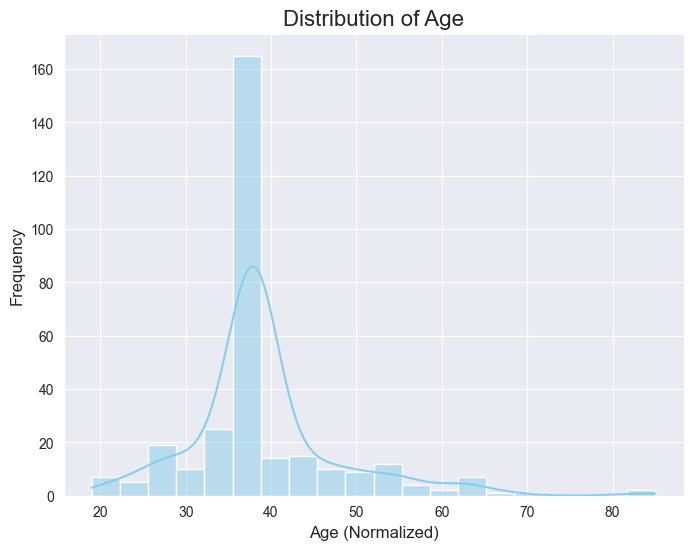

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# age bar
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age (Normalized)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

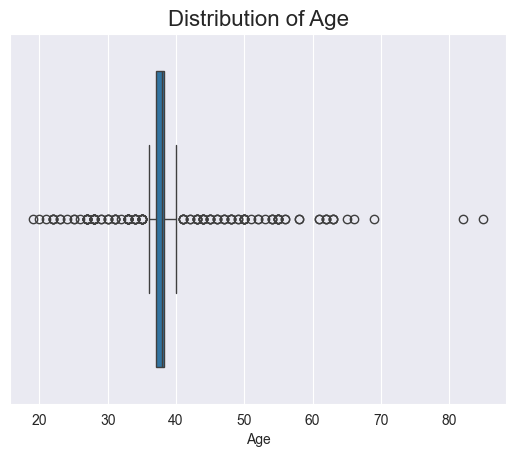

In [51]:
#box age distrubation
sns.boxplot(x=data['Age'])
plt.title('Distribution of Age', fontsize=16)

<Axes: xlabel='Age', ylabel='Density'>

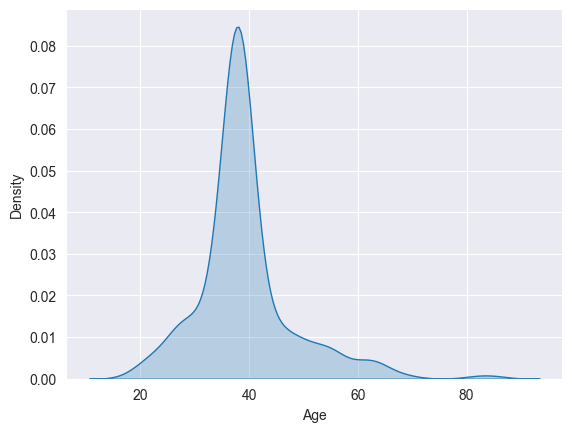

In [76]:
# age density
sns.kdeplot(data['Age'], fill=True)


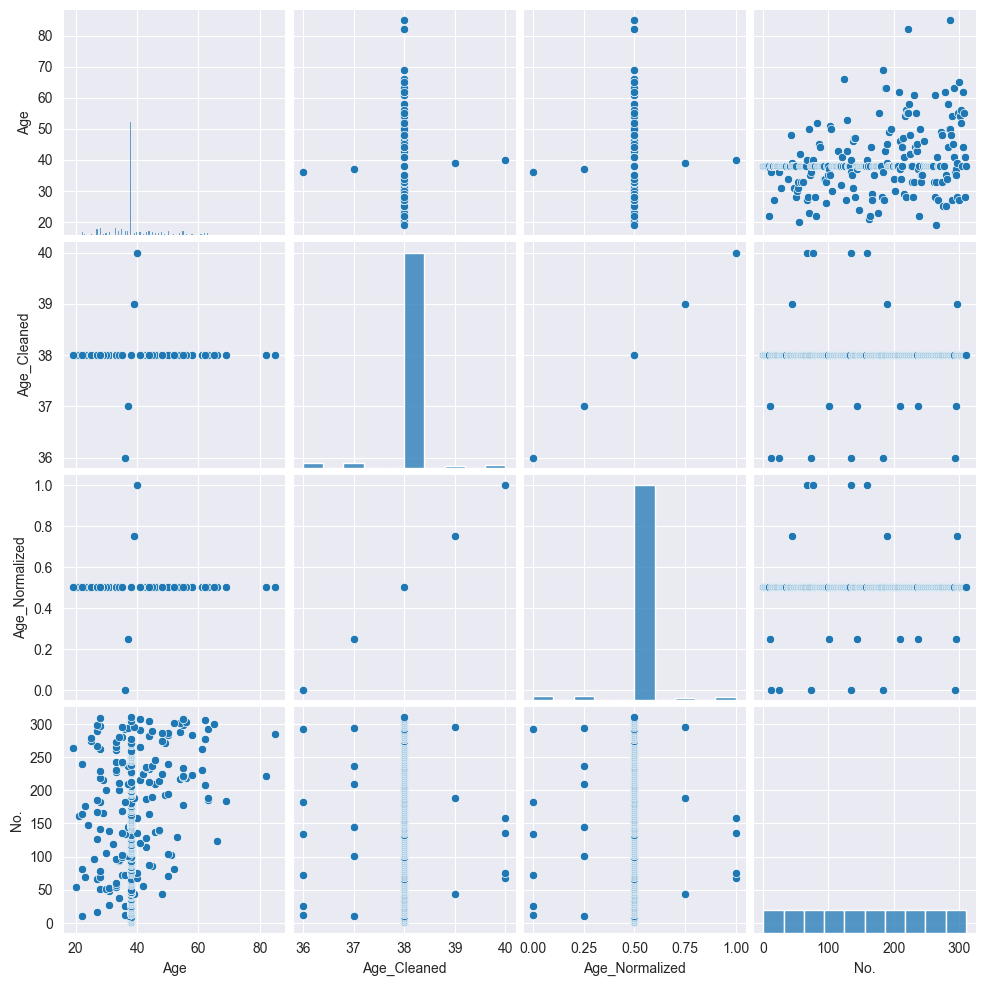

In [53]:
# Pairplot for numerical columns in the dataset
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()


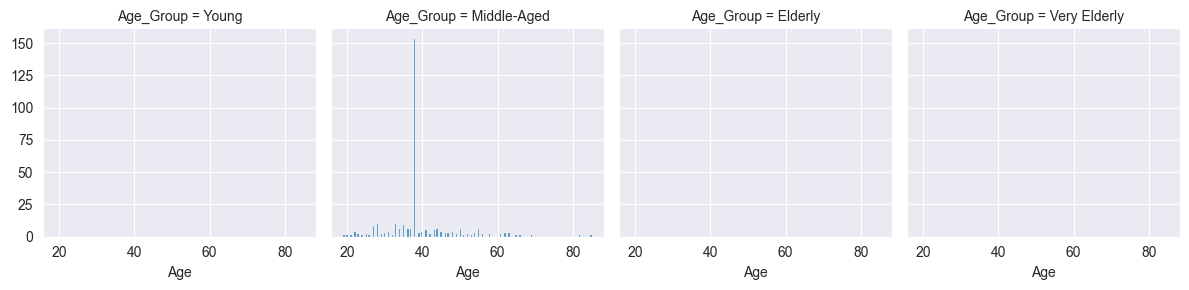

In [54]:
# age-group
g = sns.FacetGrid(data, col='Age_Group')
g.map(sns.histplot, 'Age')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75],
 [Text(0, 0, 'Avalanche'),
  Text(1, 0, 'Fall'),
  Text(2, 0, 'Exposure'),
  Text(3, 0, 'Altitude Sickness'),
  Text(4, 0, 'Base Camp Avalanche Following The April 2015 Nepal Earthquake'),
  Text(5, 0, '2014 Mount Everest Avalanche'),
  Text(6, 0, 'Unknown Cause'),
  Text(7, 0, 'Disappearance (Likely Accidental Death During Climb)'),
  Text(8, 0, 'Fall Into A Crevasse'),
  Text(9, 0, 'Exhaustion'),
  Text(10, 0, 'Heart Attack'),
  Text(11, 0, 'Crushed Under Serac'),
  Text(12, 0, 'Exhaustion On Descent'),
  Text(13, 0, 'Suspected Altitude Sickness

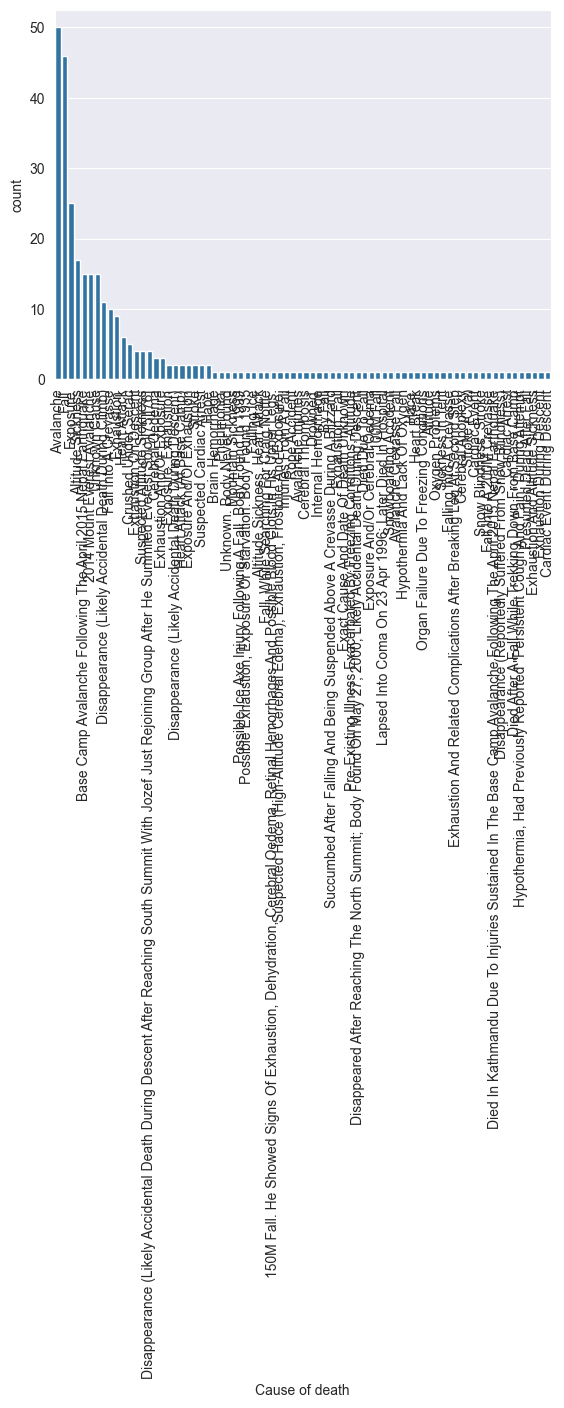

In [55]:
sns.countplot(x='Cause of death', data=data, order=data['Cause of death'].value_counts().index)
plt.xticks(rotation=90)


<Axes: xlabel='Age_Group'>

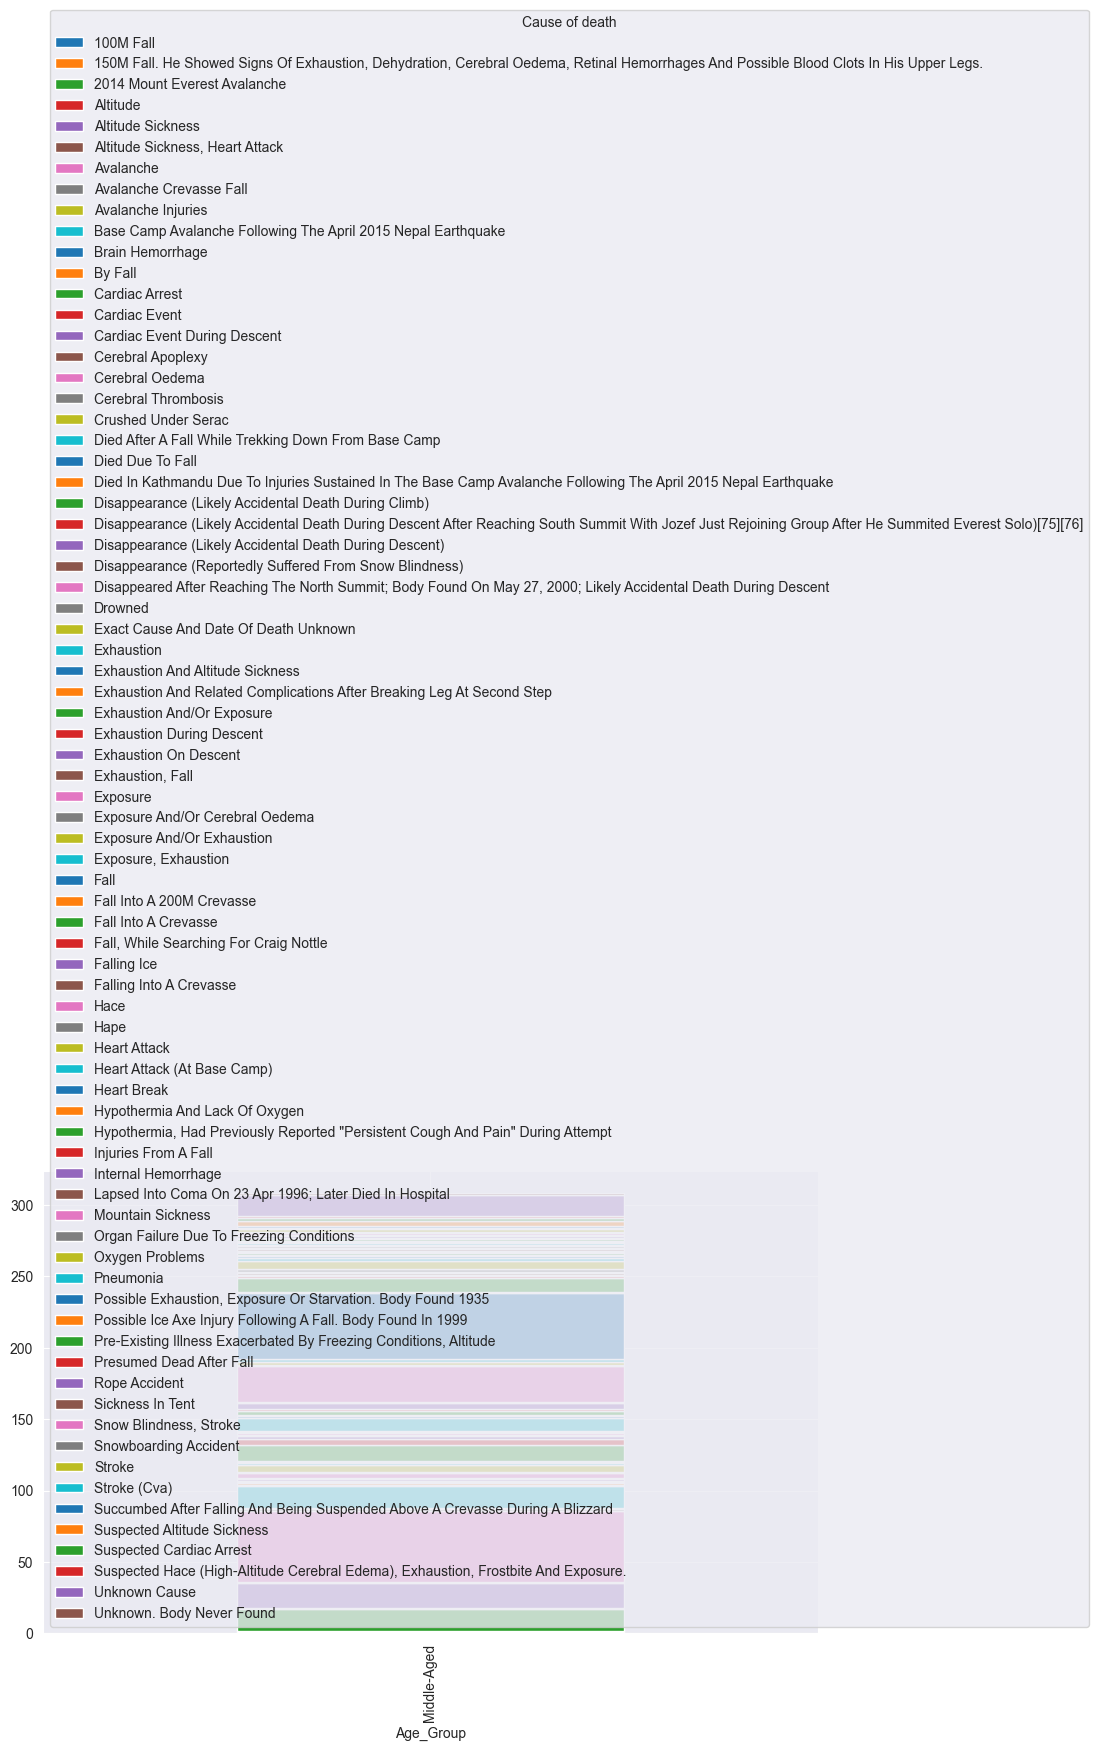

In [56]:
cause_age_group = pd.crosstab(data['Age_Group'], data['Cause of death'])
cause_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))


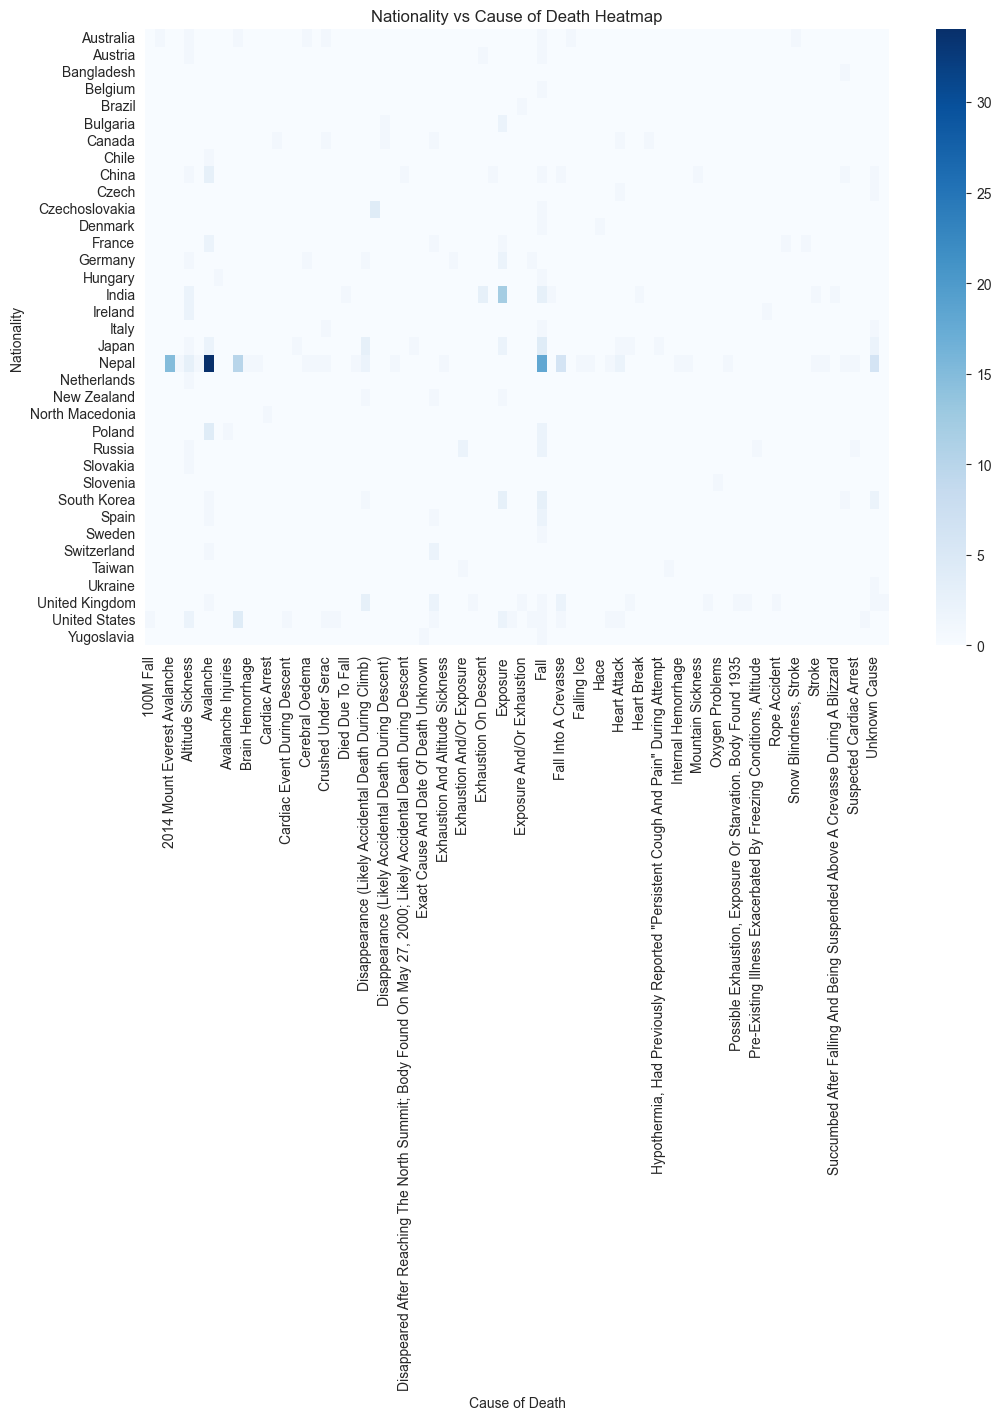

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already your DataFrame and has 'Nationality' and 'Cause of death' columns

# Create the crosstab table
crosstab = pd.crosstab(data['Nationality'], data['Cause of death'])

# Plot heatmap
plt.figure(figsize=(12, 8))  # You can adjust the figure size as needed
sns.heatmap(crosstab, annot=False, cmap='Blues', fmt='d')

plt.title('Nationality vs Cause of Death Heatmap')
plt.xlabel('Cause of Death')
plt.ylabel('Nationality')
plt.show()


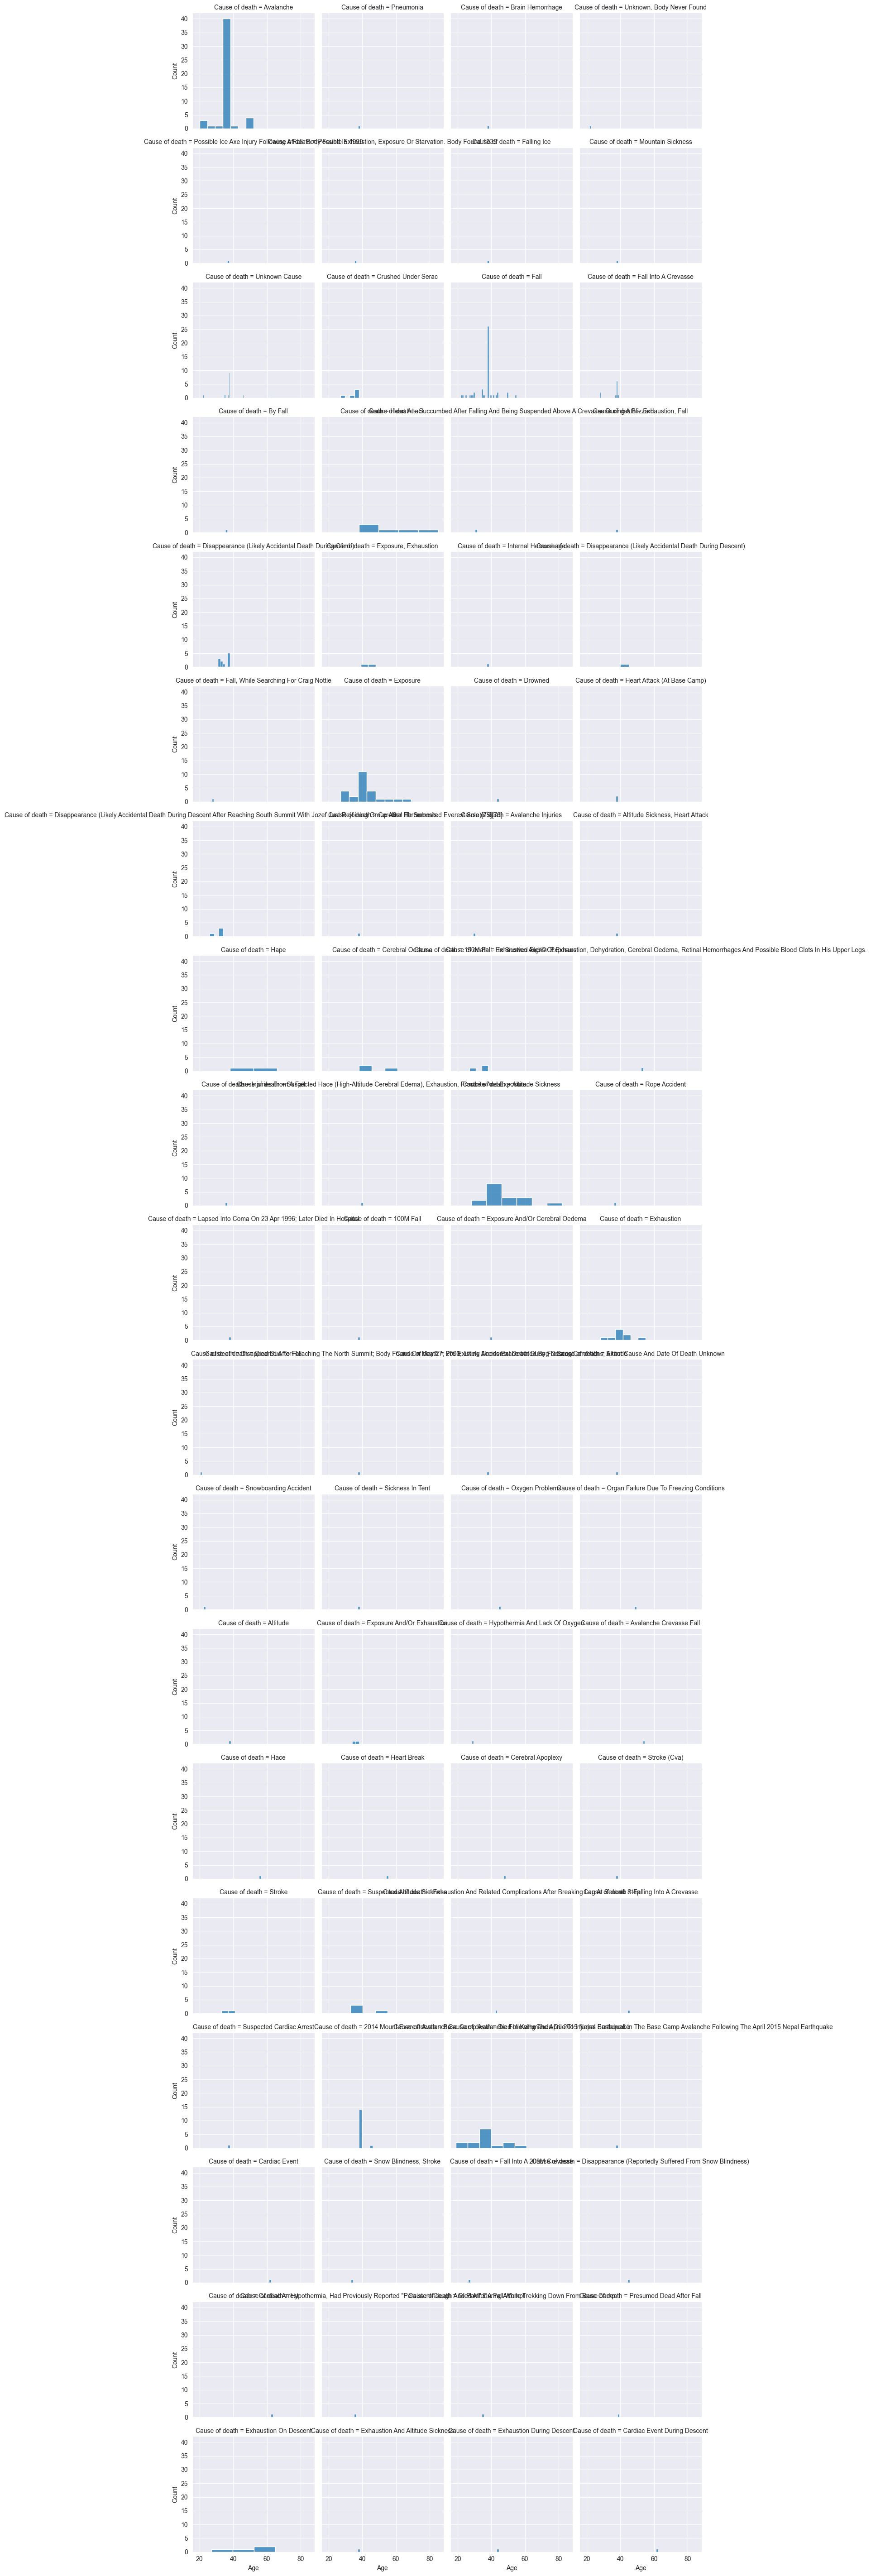

In [58]:
g = sns.FacetGrid(data, col='Cause of death', col_wrap=4, height=3)
g.map(sns.histplot, 'Age')


Text(0.5, 1.0, 'Nationality')

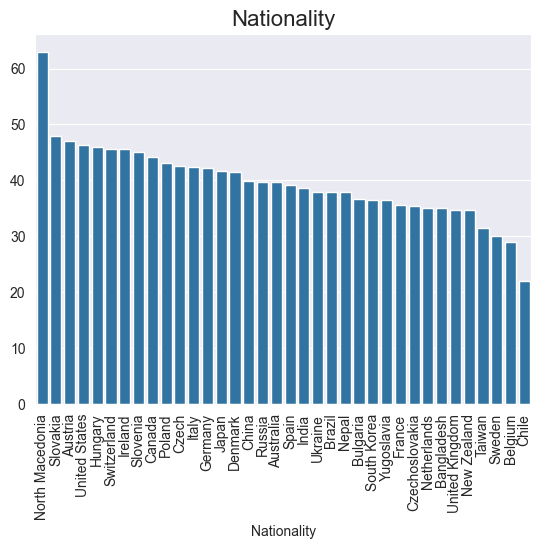

In [59]:
# Nationality Bar
nationality_age_mean = data.groupby('Nationality')['Age'].mean().sort_values(ascending=False)
sns.barplot(x=nationality_age_mean.index, y=nationality_age_mean.values)
plt.xticks(rotation=90)
plt.title('Nationality', fontsize=16)

Text(0.5, 1.0, 'Cause of Death')

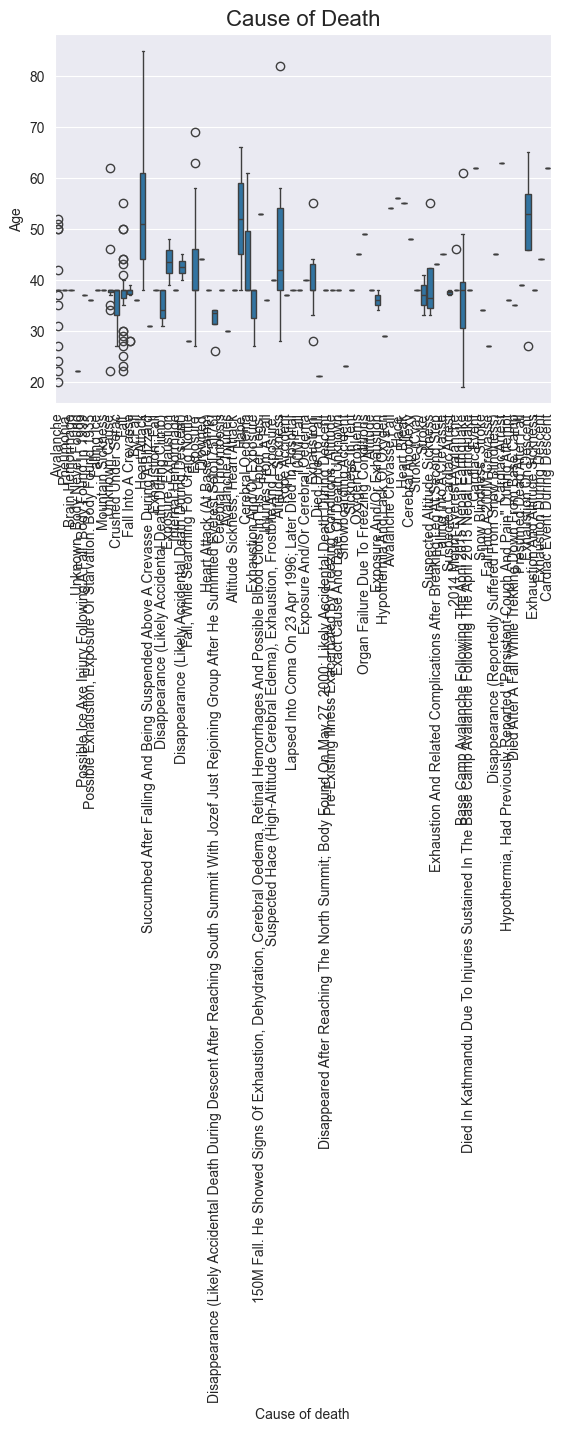

In [60]:
#Boxplot Cause of death
sns.boxplot(x='Cause of death', y='Age', data=data)
plt.xticks(rotation=90)
plt.title('Cause of Death', fontsize=16)

<Axes: xlabel='Cause of death', ylabel='Age_Group'>

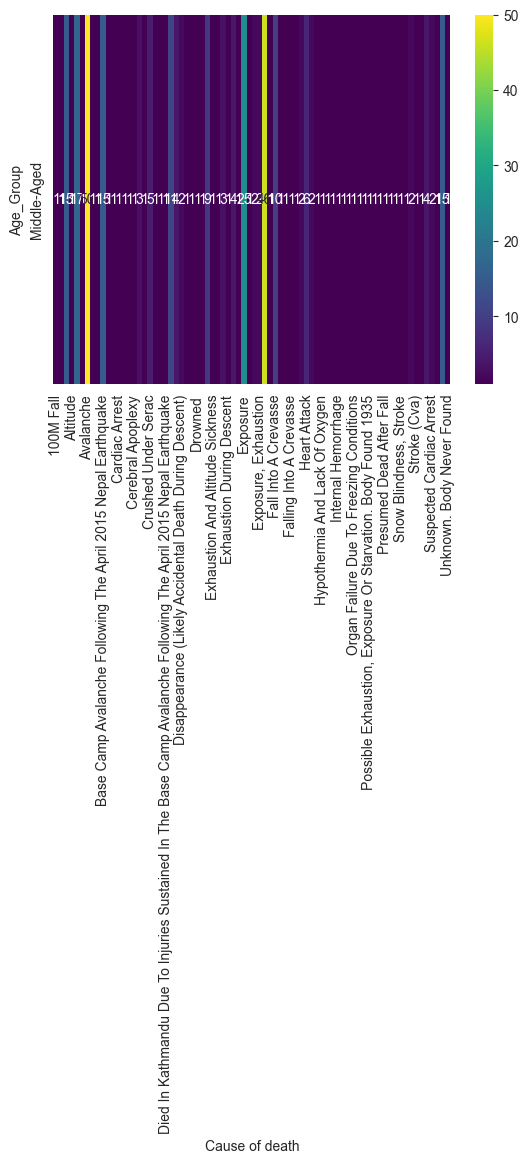

In [61]:
crosstab = pd.crosstab(data['Age_Group'], data['Cause of death'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')


Text(0.5, 1.0, 'Cause of Death')

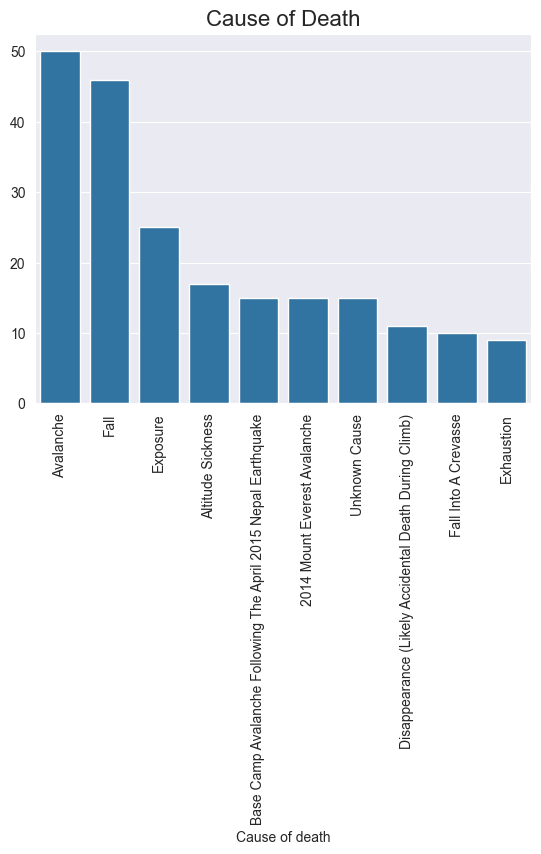

In [62]:
# BarPlot
sns.barplot(x=data['Cause of death'].value_counts().head(10).index, 
            y=data['Cause of death'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Cause of Death', fontsize=16)

sns.boxenplot(x='Age_Group', y='Age', data=data)


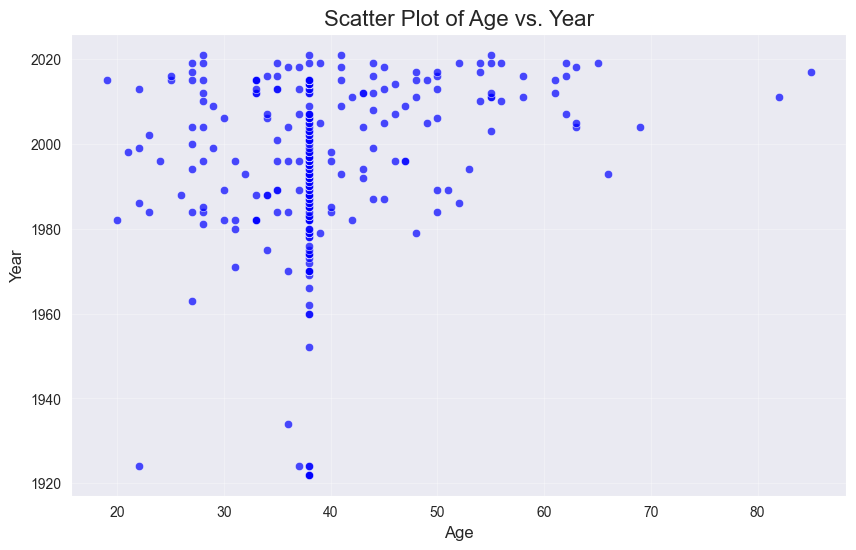

In [63]:
# age vs year scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Year', color='blue', alpha=0.7)
plt.title('Scatter Plot of Age vs. Year', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


<Axes: xlabel='Cause of death', ylabel='Age_Group'>

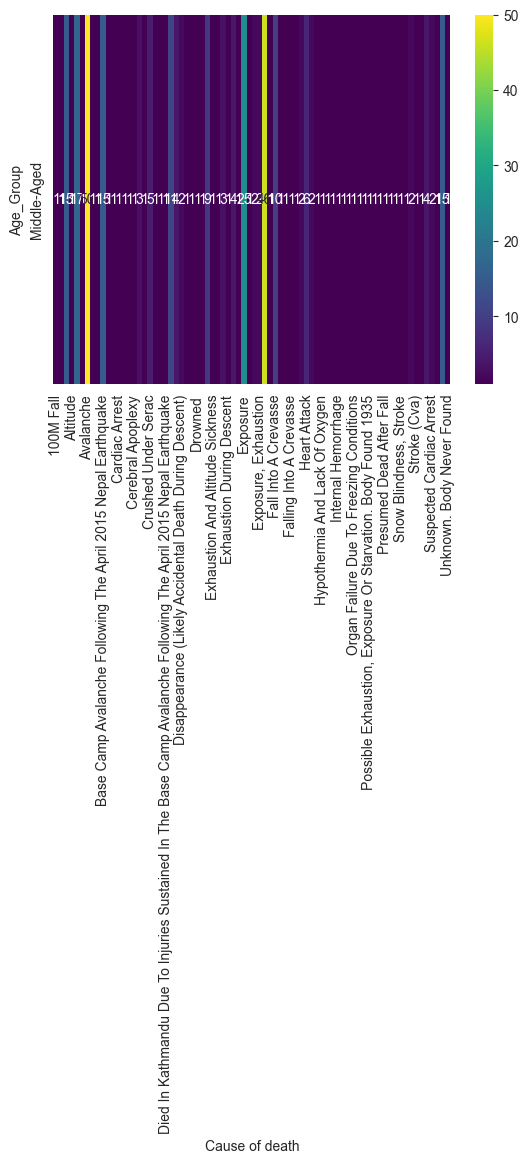

In [64]:
crosstab = pd.crosstab(data['Age_Group'], data['Cause of death'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')


Age
38.0    153
33.0     10
28.0     10
35.0      9
27.0      8
34.0      6
36.0      6
55.0      6
44.0      6
50.0      6
37.0      6
43.0      5
41.0      5
31.0      4
22.0      4
48.0      4
40.0      4
45.0      4
30.0      3
63.0      3
62.0      3
39.0      3
46.0      3
54.0      3
47.0      3
61.0      2
42.0      2
23.0      2
52.0      2
49.0      2
29.0      2
58.0      2
25.0      2
56.0      2
20.0      1
26.0      1
51.0      1
32.0      1
66.0      1
24.0      1
53.0      1
21.0      1
69.0      1
82.0      1
19.0      1
85.0      1
65.0      1
Name: count, dtype: int64


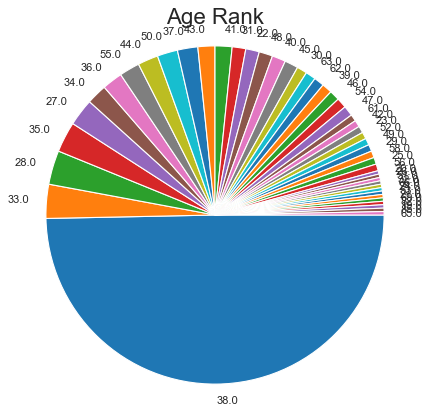

In [65]:
# age rank
age=data['Age']
age1=age.value_counts()
print(age1)
plt.figure(figsize=(6,6), dpi=80)
plt.pie(age1, labels=age1.index.tolist(),counterclock=False,startangle=0)
plt.axis('equal')
plt.title('Age Rank', fontsize=20)
plt.show()

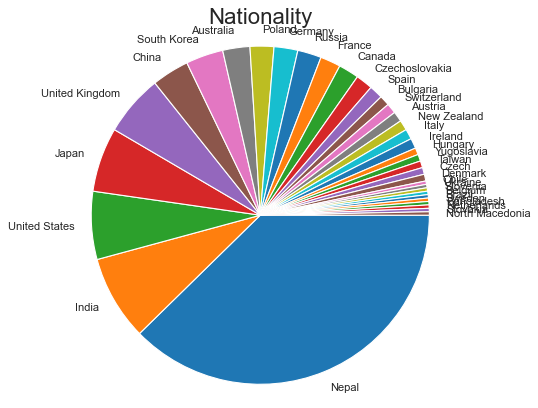

In [66]:
# nationality pie-chart
nation=data['Nationality']
nation1=nation.value_counts()
plt.figure(figsize=(6,6), dpi=80)
plt.pie(nation1, labels=nation1.index.tolist(),counterclock=False,startangle=0)
plt.axis('equal')
plt.title('Nationality', fontsize=20)
plt.show()

Cause of death
Avalanche                    50
Fall                         46
Exposure                     25
Disappearance (Likely Acc    17
Altitude Sickness            17
                             ..
Hypothermia, Had Previous     1
Presumed Dead After Fall      1
Exhaustion And Altitude S     1
Exhaustion During Descent     1
Cardiac Event During Desc     1
Name: count, Length: 74, dtype: int64


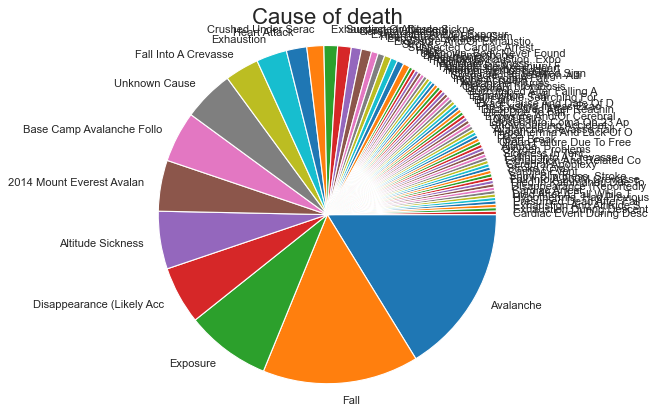

In [67]:
# pie-chart cause of death
cause=data['Cause of death'].apply(lambda x: x[0:25])
cause1=cause.value_counts()
print(cause1)
plt.figure(figsize=(6,6), dpi=80)
plt.pie(cause1, labels=cause1.index.tolist(),counterclock=False,startangle=0)
plt.axis('equal')
plt.title('Cause of death', fontsize=20)
plt.show()

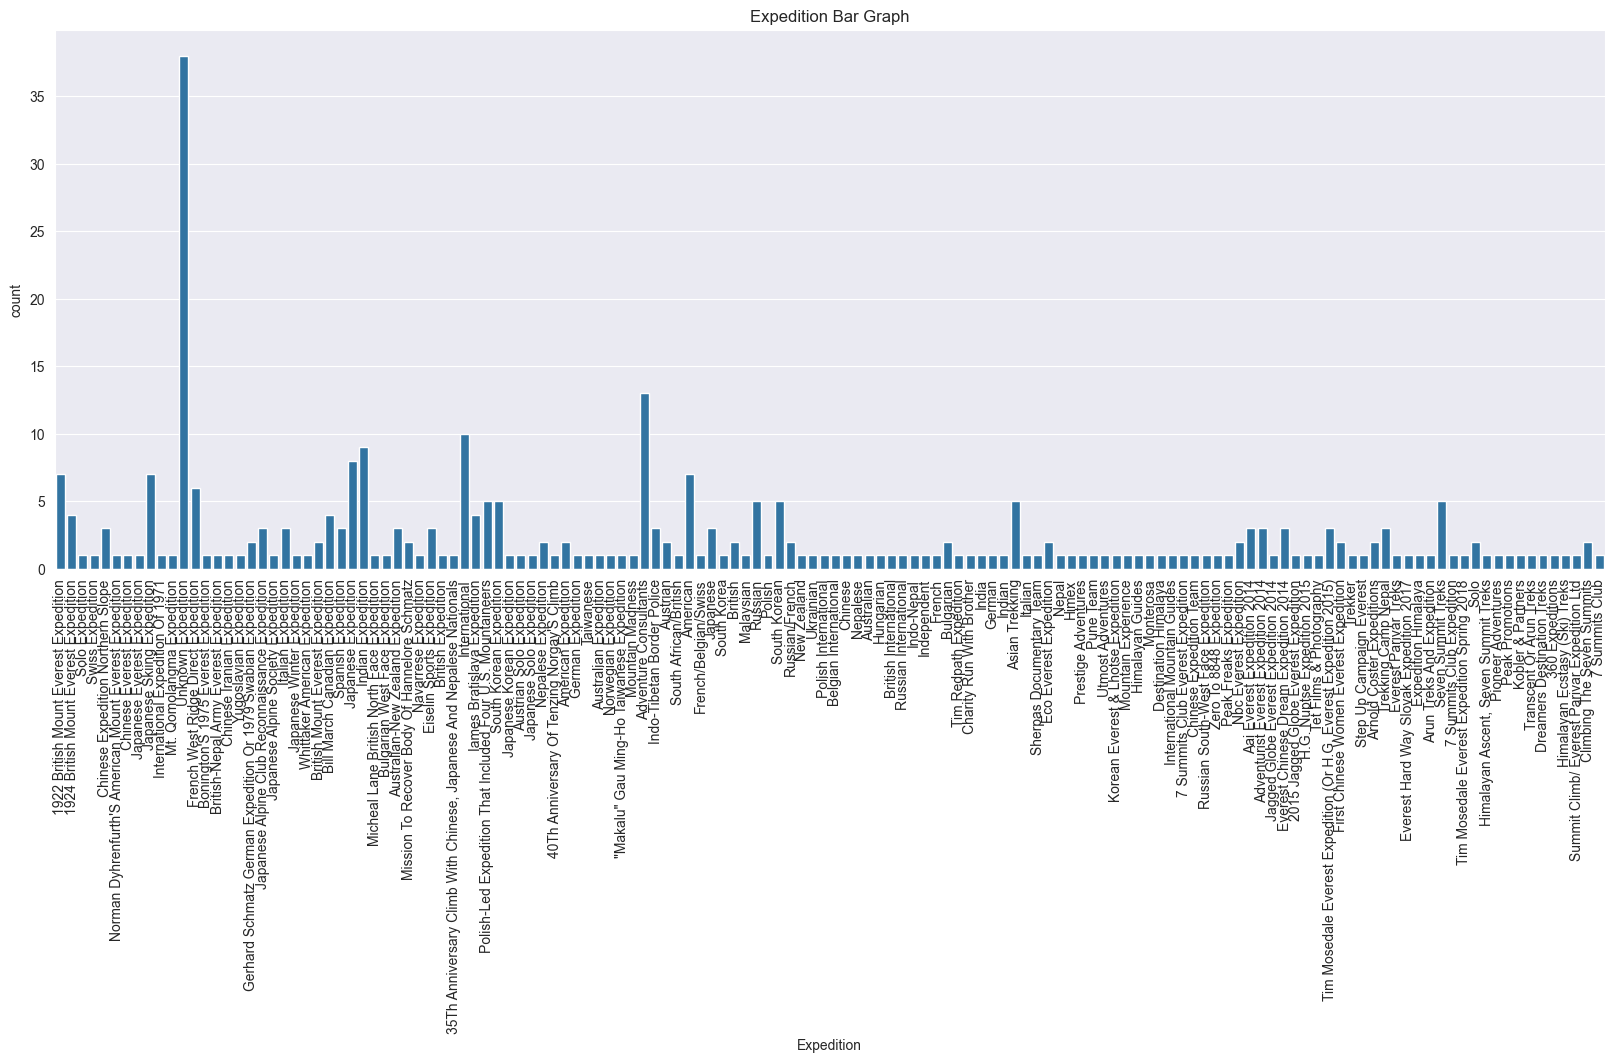

In [68]:
# expedition Bar Graph
plt.figure(figsize=(20,7))
sns.countplot(x="Expedition", data=data)
plt.title("Expedition Bar Graph")
plt.xticks(rotation=90)
plt.show()

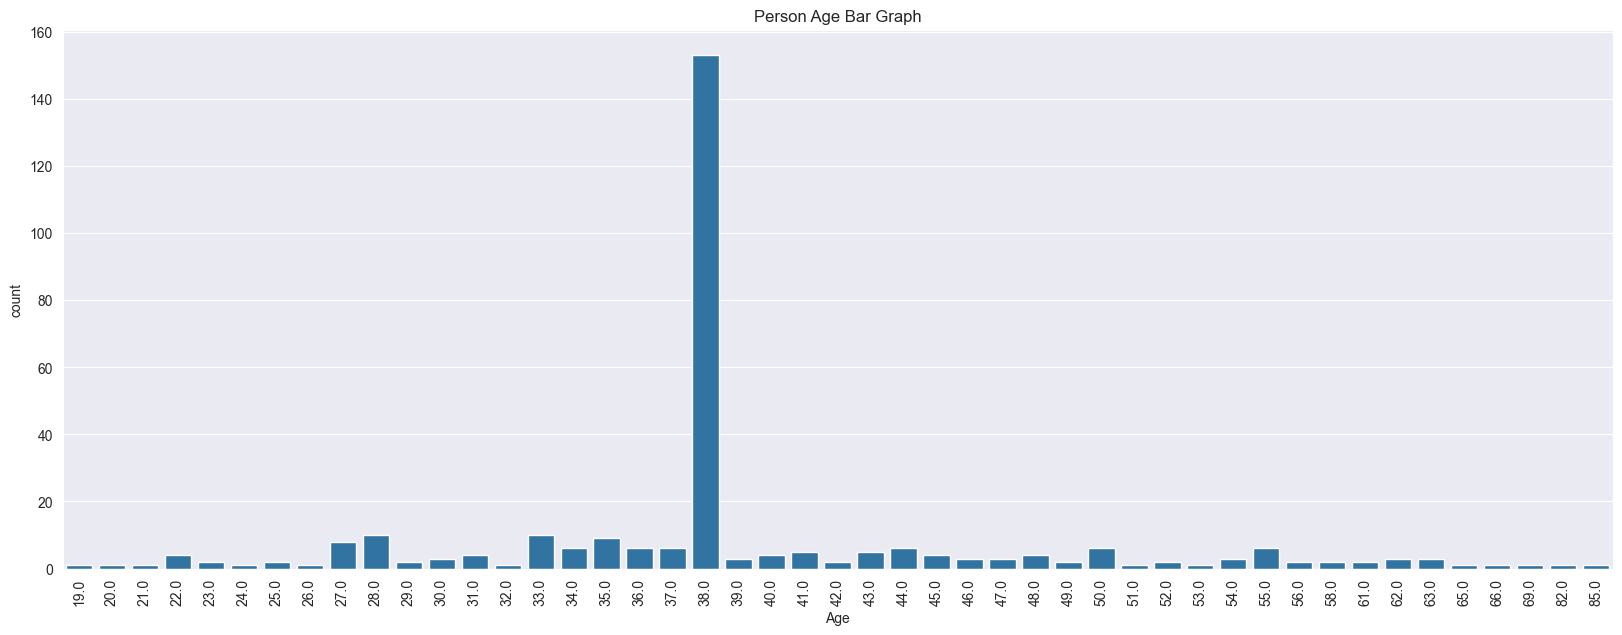

In [69]:
# person bar graph
plt.figure(figsize=(20,7))
sns.countplot(x="Age", data=data)
plt.title('Person Age Bar Graph')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0.98, 'Nationality Distripution')

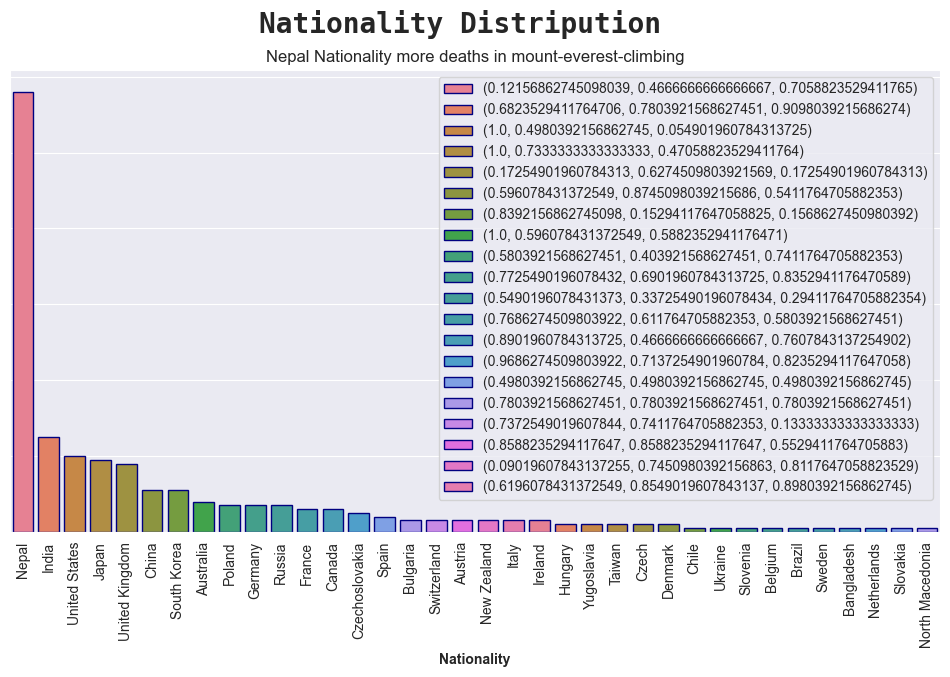

In [70]:
#bar Graph Nationality
color = sns.color_palette("tab20", n_colors=len(data['Nationality'].unique()))
fig = plt.figure(figsize=(12,6))
sns.barplot(x=data['Nationality'].value_counts().index,y=data['Nationality'].value_counts().values,hue=color,edgecolor='#000080')
plt.xlabel('Nationality',weight='bold')
plt.tick_params(axis='x',labelsize=10,rotation=90)
plt.tick_params(labelleft=False,left=False)
plt.title('Nepal Nationality more deaths in mount-everest-climbing')
plt.suptitle('Nationality Distripution',weight='bold',fontname='monospace',fontsize=20)

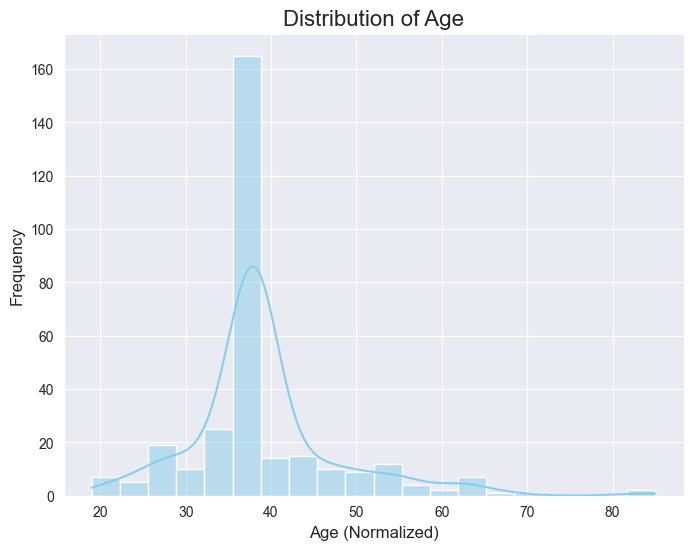

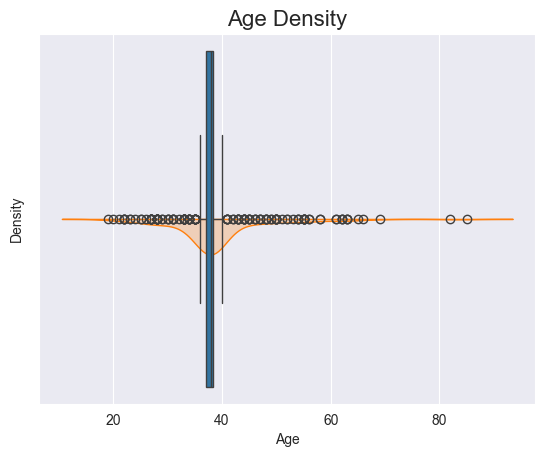

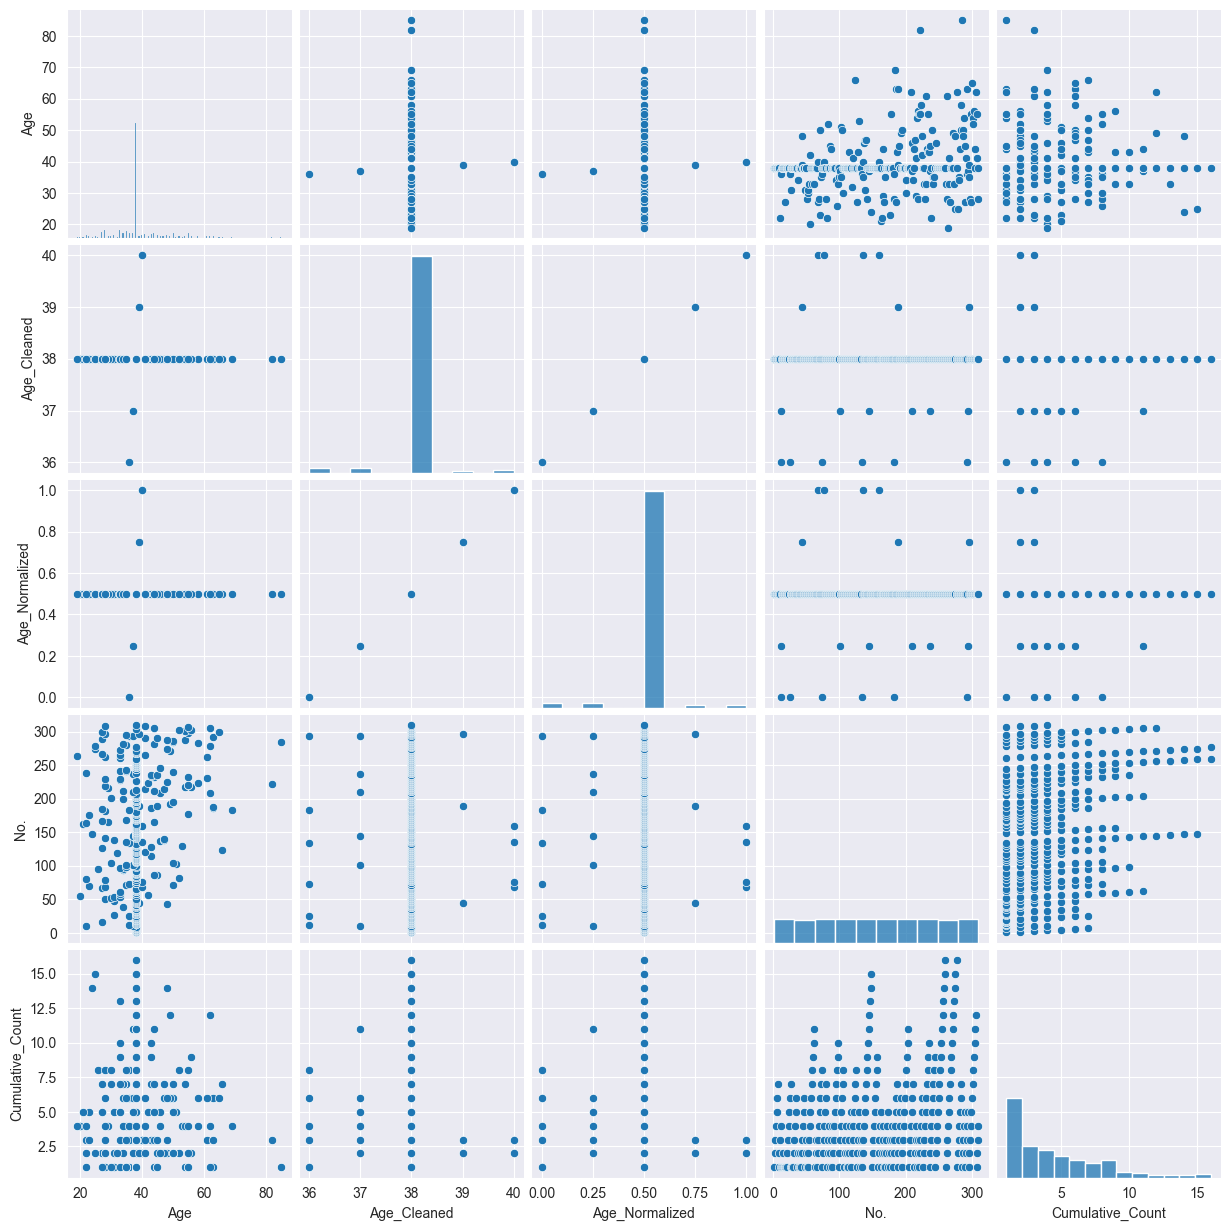

Cause of death
Avalanche                    50
Fall                         46
Exposure                     25
Disappearance (Likely Acc    17
Altitude Sickness            17
                             ..
Hypothermia, Had Previous     1
Presumed Dead After Fall      1
Exhaustion And Altitude S     1
Exhaustion During Descent     1
Cardiac Event During Desc     1
Name: count, Length: 74, dtype: int64


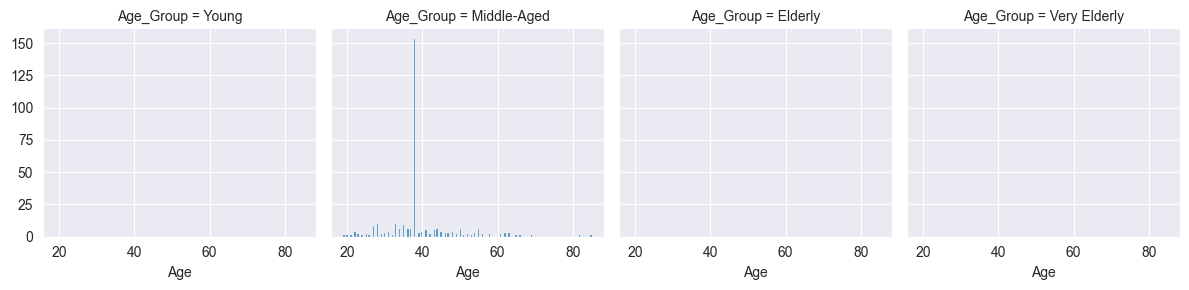

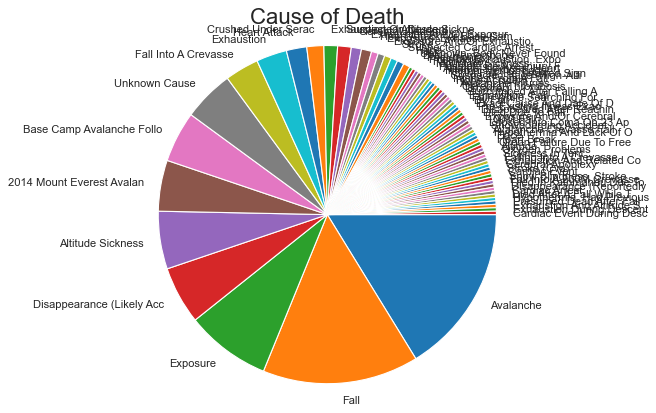

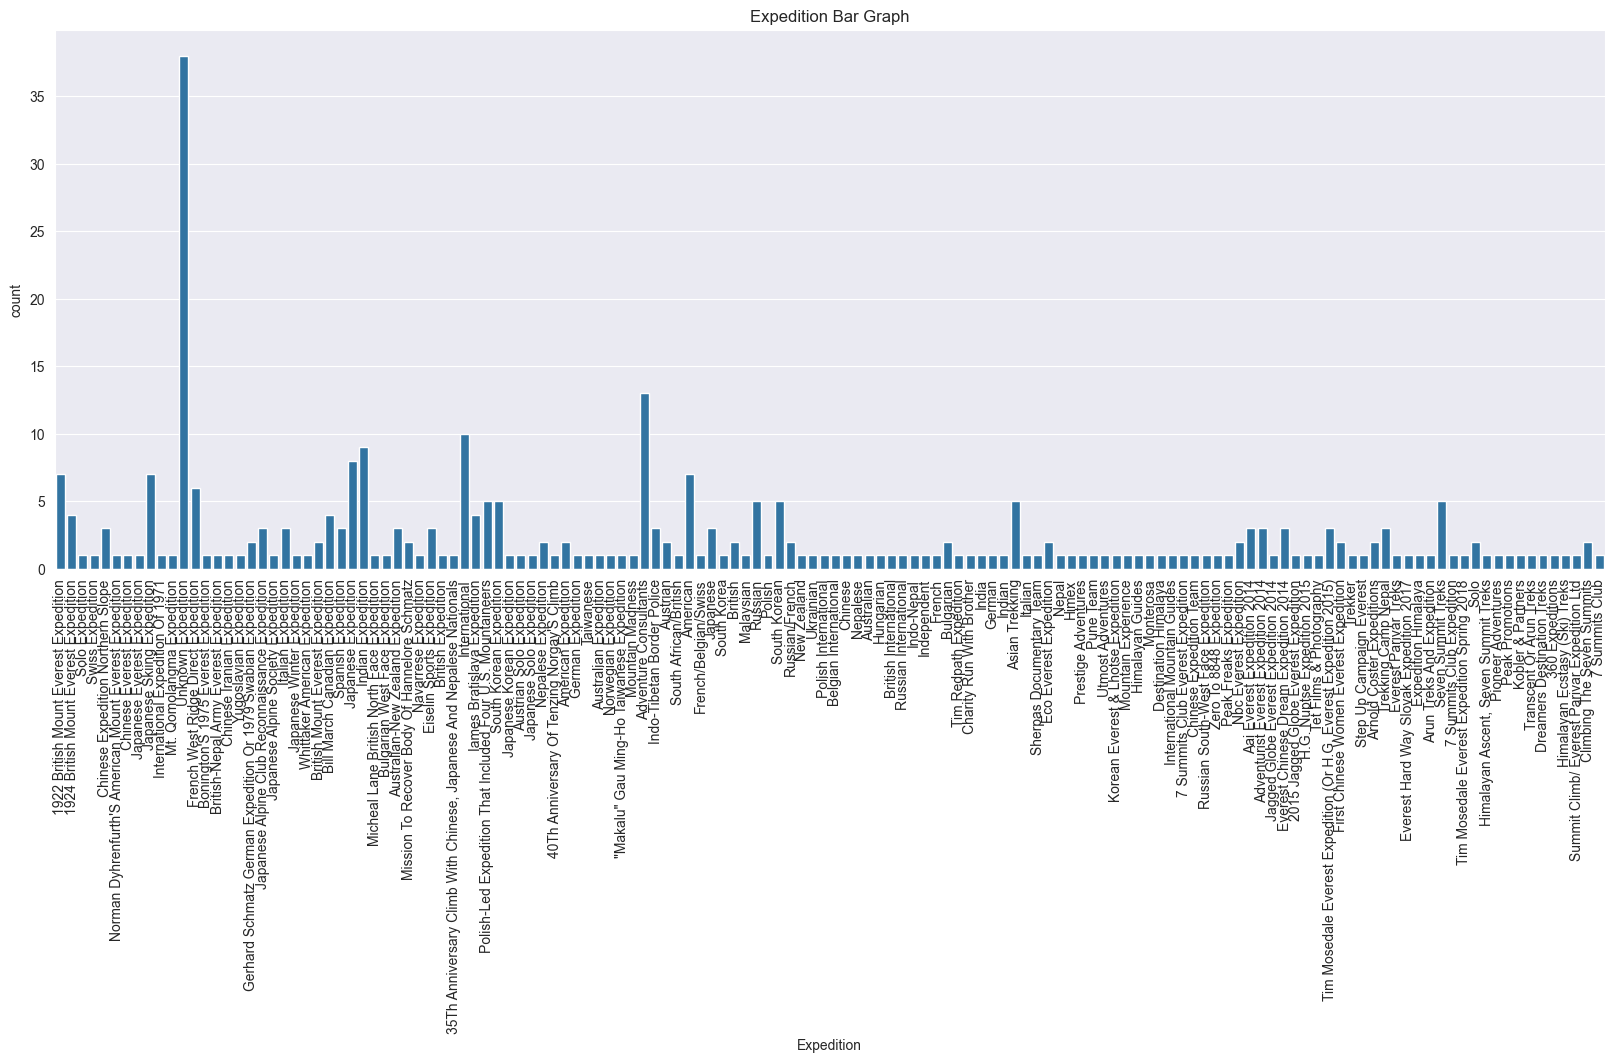

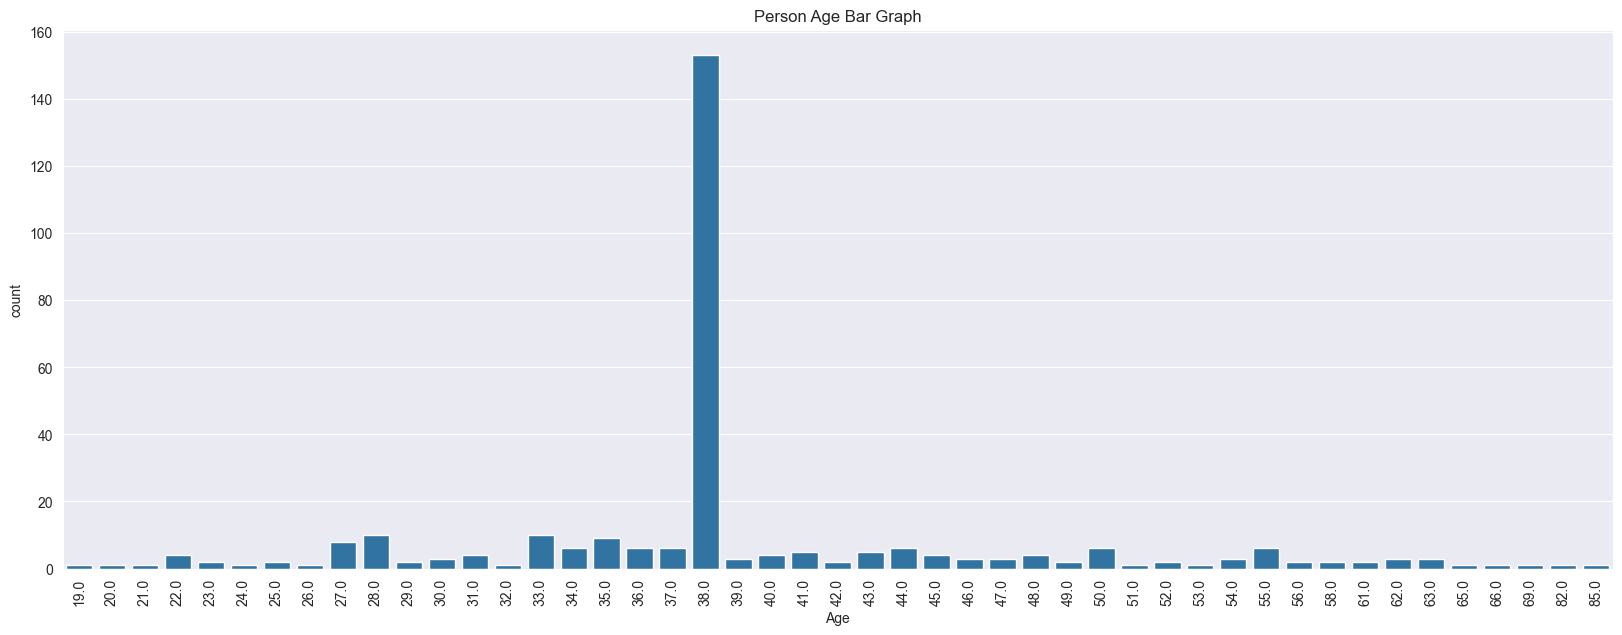

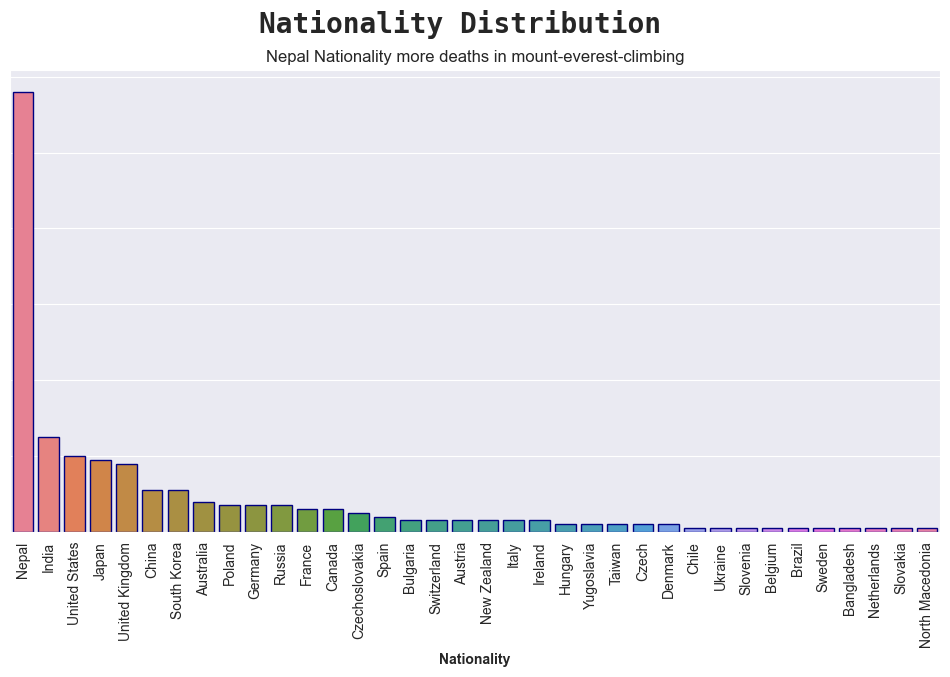

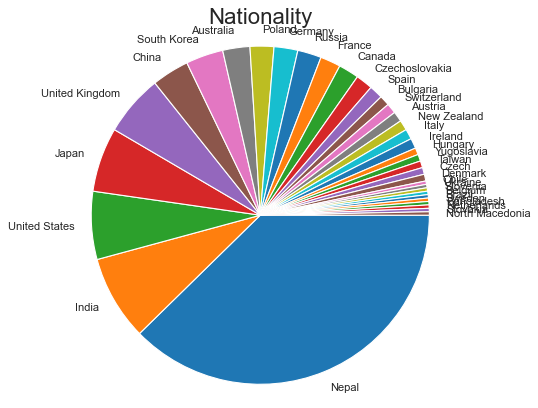

Age
38.0    153
33.0     10
28.0     10
35.0      9
27.0      8
34.0      6
36.0      6
55.0      6
44.0      6
50.0      6
37.0      6
43.0      5
41.0      5
31.0      4
22.0      4
48.0      4
40.0      4
45.0      4
30.0      3
63.0      3
62.0      3
39.0      3
46.0      3
54.0      3
47.0      3
61.0      2
42.0      2
23.0      2
52.0      2
49.0      2
29.0      2
58.0      2
25.0      2
56.0      2
20.0      1
26.0      1
51.0      1
32.0      1
66.0      1
24.0      1
53.0      1
21.0      1
69.0      1
82.0      1
19.0      1
85.0      1
65.0      1
Name: count, dtype: int64


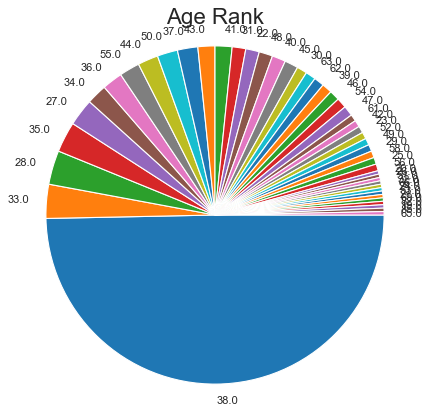

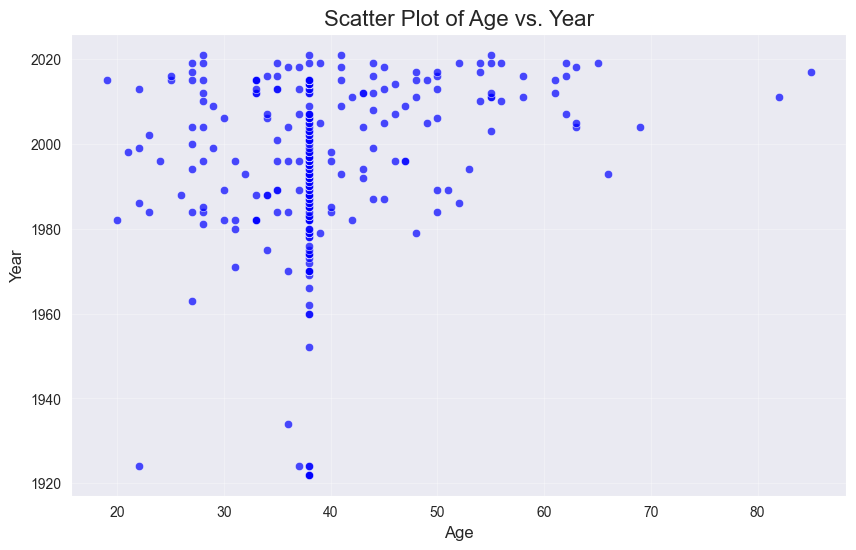

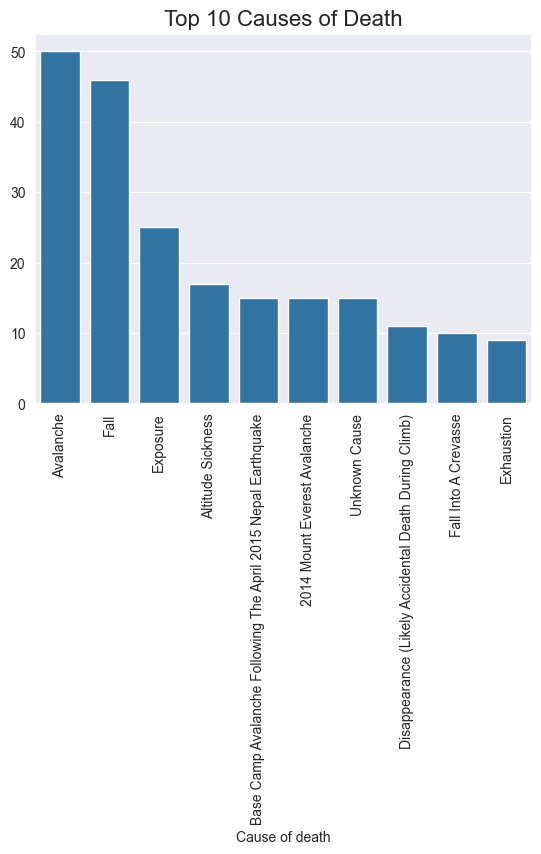

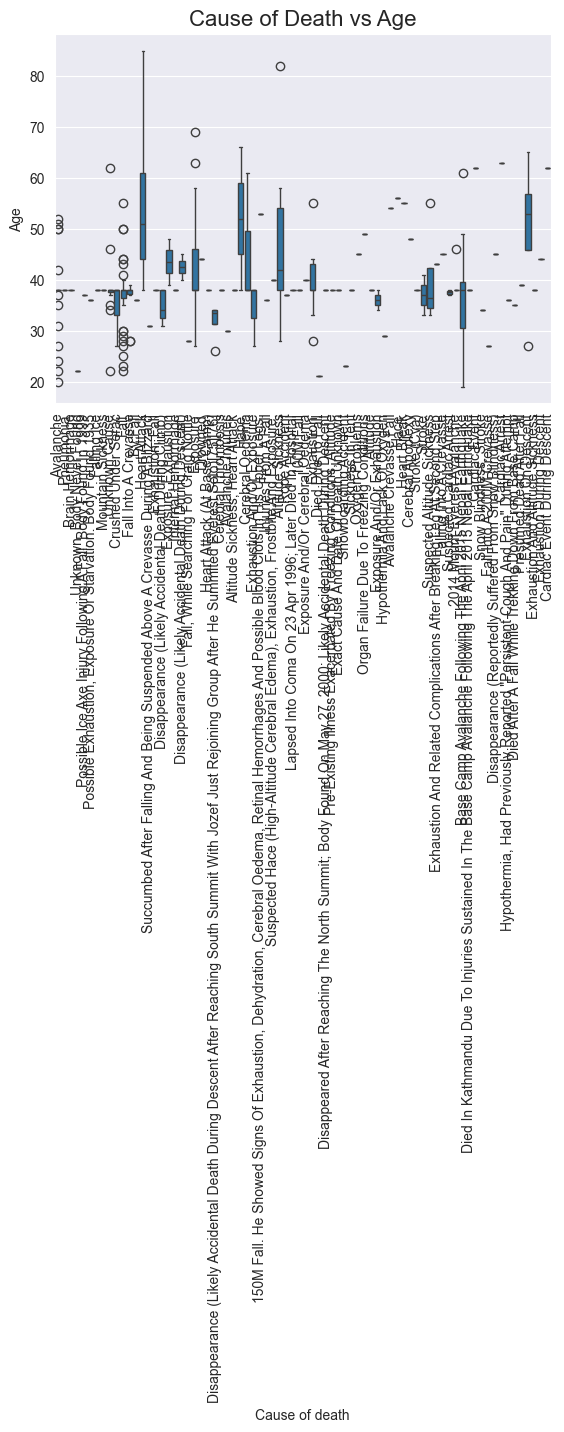

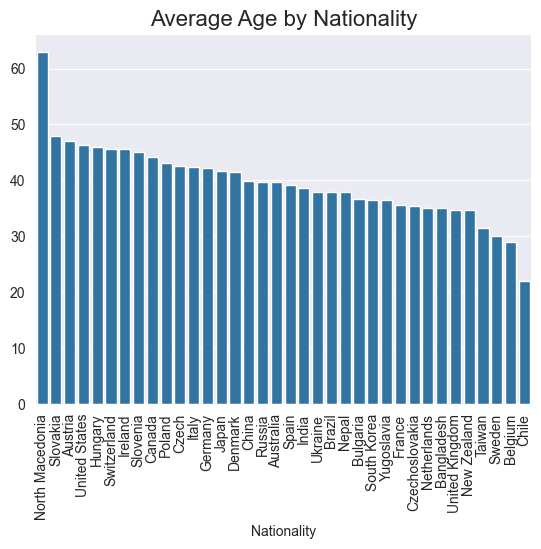

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age (Normalized)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Box plot for age distribution
sns.boxplot(x=data['Age'])
plt.title('Distribution of Age', fontsize=16)

# Age density plot (updated to avoid deprecation warning)
sns.kdeplot(data['Age'], fill=True)
plt.title('Age Density', fontsize=16)
plt.show()

# Pairplot for numerical columns in the dataset
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

# Facet grid for age-group
g = sns.FacetGrid(data, col='Age_Group')
g.map(sns.histplot, 'Age')

# Pie chart for cause of death
cause = data['Cause of death'].apply(lambda x: x[0:25])
cause1 = cause.value_counts()
print(cause1)
plt.figure(figsize=(6, 6), dpi=80)
plt.pie(cause1, labels=cause1.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Cause of Death', fontsize=20)
plt.show()

# Expedition bar graph
plt.figure(figsize=(20, 7))
sns.countplot(x="Expedition", data=data)
plt.title("Expedition Bar Graph")
plt.xticks(rotation=90)
plt.show()

# Person age bar graph
plt.figure(figsize=(20, 7))
sns.countplot(x="Age", data=data)
plt.title('Person Age Bar Graph')
plt.xticks(rotation=90)
plt.show()

# Nationality Bar Graph (fixed `palette` issue)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data['Nationality'].value_counts().index,
    y=data['Nationality'].value_counts().values,
    hue=data['Nationality'].value_counts().index,  # Optional, for grouping
    edgecolor='#000080'
)
plt.xlabel('Nationality', weight='bold')
plt.tick_params(axis='x', labelsize=10, rotation=90)
plt.tick_params(labelleft=False, left=False)
plt.title('Nepal Nationality more deaths in mount-everest-climbing')
plt.suptitle('Nationality Distribution', weight='bold', fontname='monospace', fontsize=20)
plt.show()

# Nationality pie chart
nation = data['Nationality']
nation1 = nation.value_counts()
plt.figure(figsize=(6, 6), dpi=80)
plt.pie(nation1, labels=nation1.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Nationality', fontsize=20)
plt.show()

# Age rank pie chart
age = data['Age']
age1 = age.value_counts()
print(age1)
plt.figure(figsize=(6, 6), dpi=80)
plt.pie(age1, labels=age1.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Age Rank', fontsize=20)
plt.show()

# Age vs year scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Year', color='blue', alpha=0.7)
plt.title('Scatter Plot of Age vs. Year', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Bar plot for top 10 causes of death
sns.barplot(x=data['Cause of death'].value_counts().head(10).index, 
            y=data['Cause of death'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Top 10 Causes of Death', fontsize=16)
plt.show()

# Box plot for Cause of Death vs Age
sns.boxplot(x='Cause of death', y='Age', data=data)
plt.xticks(rotation=90)
plt.title('Cause of Death vs Age', fontsize=16)
plt.show()

# Nationality vs Age bar plot (average age per nationality)
nationality_age_mean = data.groupby('Nationality')['Age'].mean().sort_values(ascending=False)
sns.barplot(x=nationality_age_mean.index, y=nationality_age_mean.values)
plt.xticks(rotation=90)
plt.title('Average Age by Nationality', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Nationality')

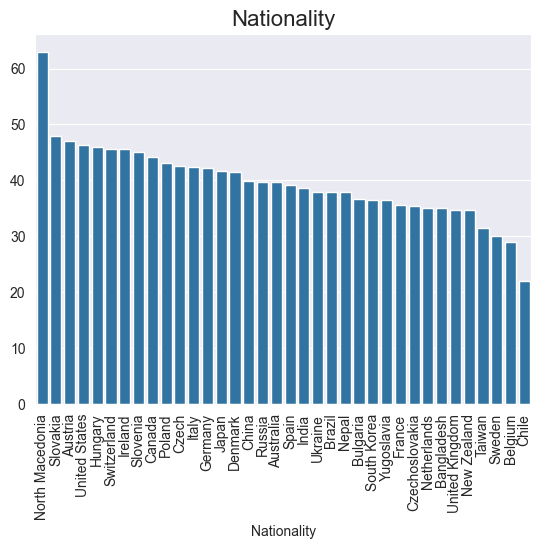

In [72]:
# Nationality Bar
nationality_age_mean = data.groupby('Nationality')['Age'].mean().sort_values(ascending=False)
sns.barplot(x=nationality_age_mean.index, y=nationality_age_mean.values)
plt.xticks(rotation=90)
plt.title('Nationality', fontsize=16)

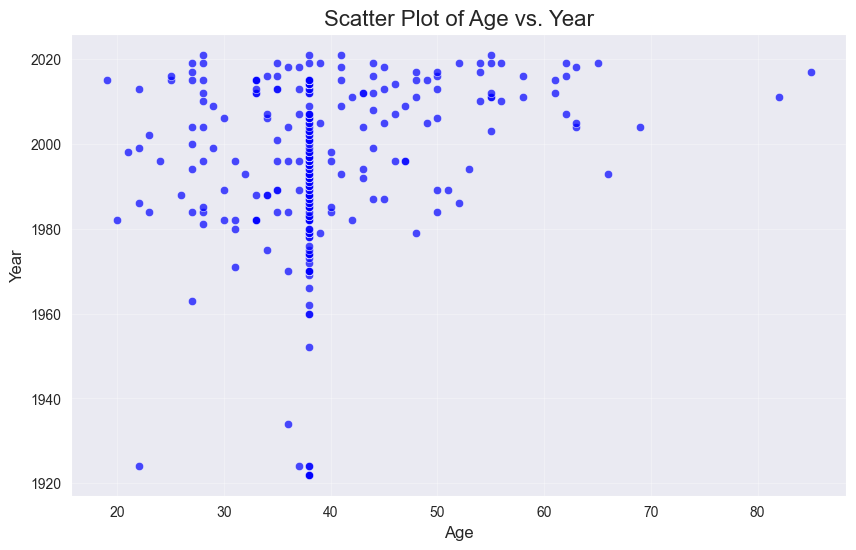

In [73]:
# age vs year scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Year', color='blue', alpha=0.7)
plt.title('Scatter Plot of Age vs. Year', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

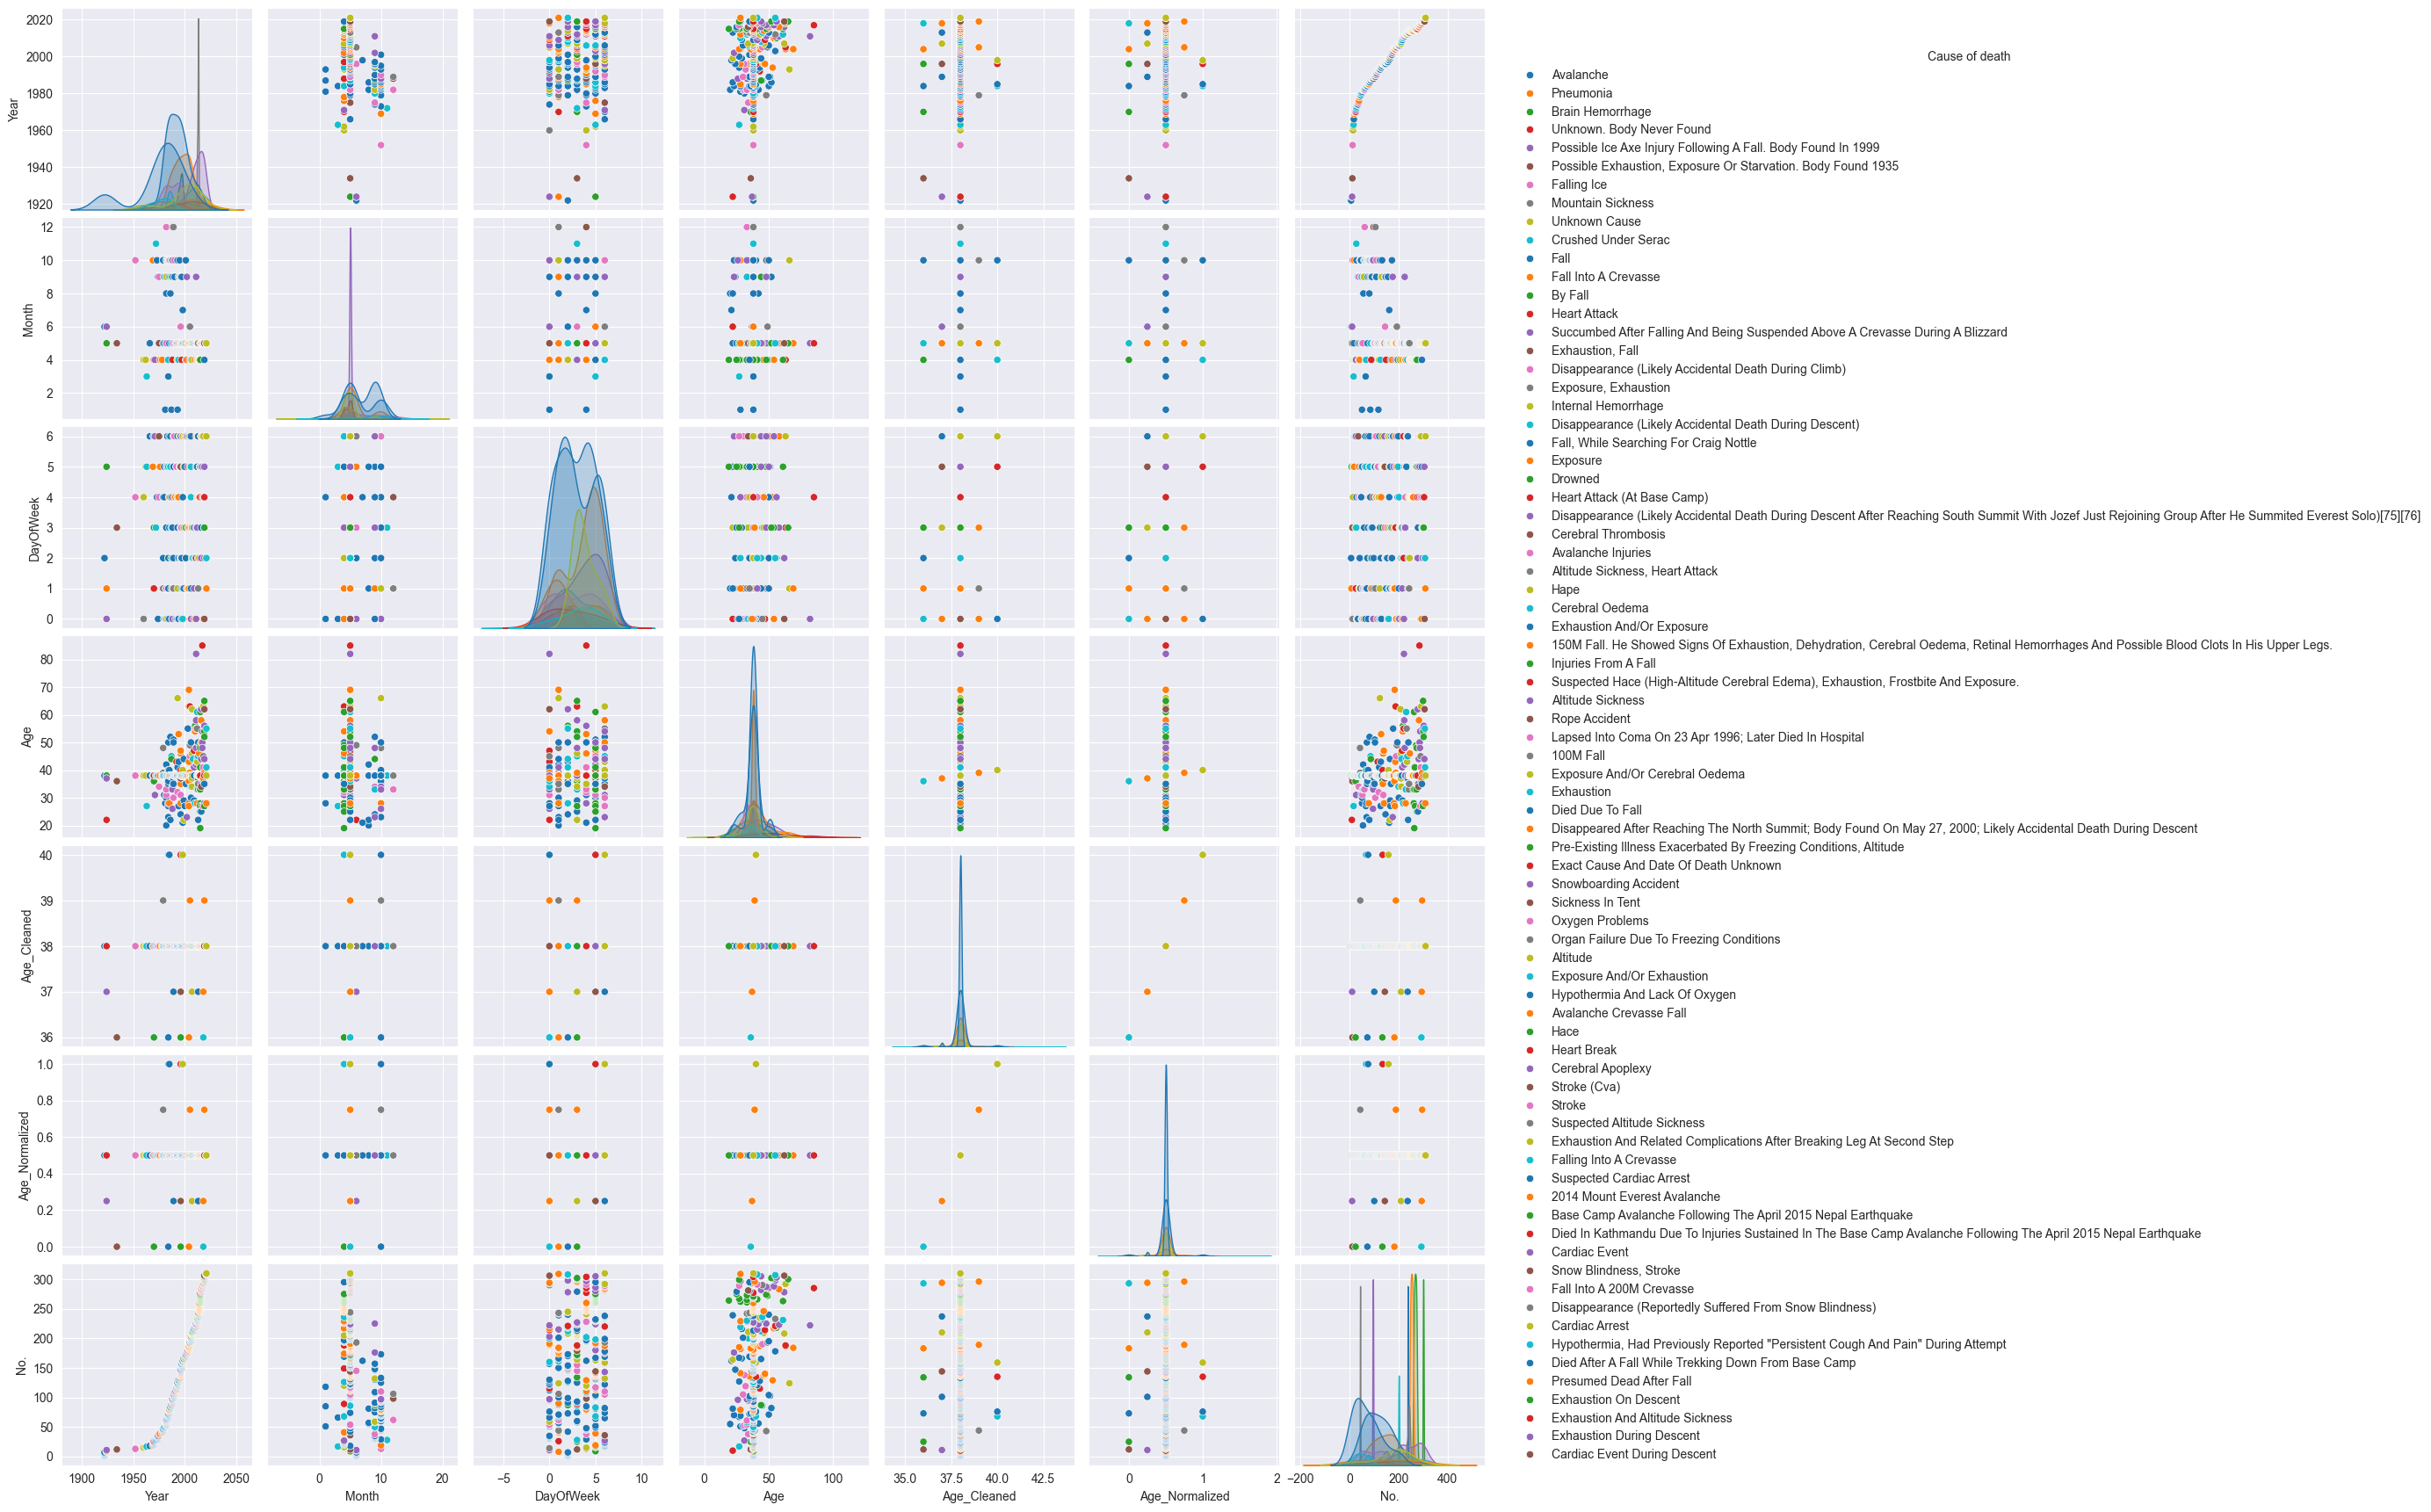

In [74]:
#  Dependency Plots
sns.pairplot(data, hue='Cause of death', palette='tab10')
plt.show()


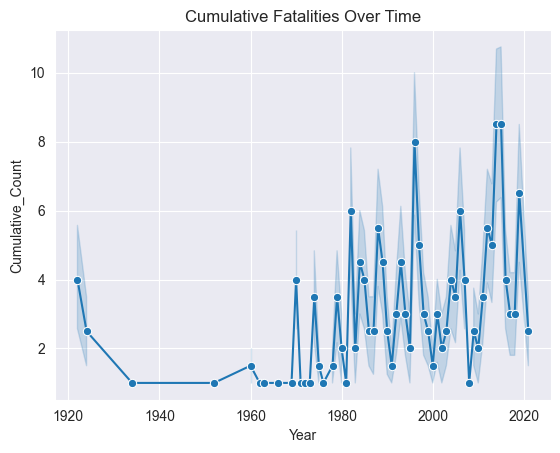

In [75]:
data = data.copy()  # Ensure data is not a slice

data['Cumulative_Count'] = data.groupby('Year').cumcount() + 1

sns.lineplot(x='Year', y='Cumulative_Count', data=data, marker='o')
plt.title('Cumulative Fatalities Over Time')
plt.show()
